In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import scipy
from scipy.stats import f_oneway,chi2_contingency

In [3]:
df1=pd.read_csv("/Users/it012305/Downloads/project_1_dataset/orders.csv")

In [4]:
df1.head(10)

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   
5   3367565        1    prior             6          2                  7   
6    550135        1    prior             7          1                  9   
7   3108588        1    prior             8          1                 14   
8   2295261        1    prior             9          1                 16   
9   2550362        1    prior            10          4                  8   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
5                    19.0  
6                    20.0  
7                    14.0  
8                     0.0  
9                    30.0

In [5]:
df1.shape

(3421083, 7)

In [6]:
z=df1['eval_set'].value_counts()

In [7]:
z.reset_index()

eval_set    count
0    prior  3214874
1    train   131209
2     test    75000

In [8]:
df1[df1['eval_set']=='test']

order_id  user_id eval_set  order_number  order_dow  \
38        2774568        3     test            13          5   
44         329954        4     test             6          3   
53        1528013        6     test             4          3   
96        1376945       11     test             8          6   
102       1356845       12     test             6          1   
...           ...      ...      ...           ...        ...   
3420918   2728930   206202     test            23          2   
3420929    350108   206204     test             5          4   
3421001   1043943   206206     test            68          0   
3421018   2821651   206207     test            17          2   
3421068    803273   206208     test            50          5   

         order_hour_of_day  days_since_prior_order  
38                      15                    11.0  
44                      12                    30.0  
53                      16                    22.0  
96                      11                     8.0  
102                     20                    30.0  
...                    ...                     ...  
3420918                 17                     6.0  
3420929                 14                    14.0  
3421001                 20                     0.0  
3421018                 13                    14.0  
3421068                 11                     4.0  

[75000 rows x 7 columns]

In [9]:
df2=pd.read_csv("/Users/it012305/Downloads/project_1_dataset/products.csv")

In [10]:
#df2=pd.read_csv("/Users/soumik/Downloads/project_1_dataset/products.csv")

In [11]:
df2.head(10)

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   
5           6                                       Dry Nose Oil        11   
6           7                     Pure Coconut Water With Orange        98   
7           8                  Cut Russet Potatoes Steam N' Mash       116   
8           9                  Light Strawberry Blueberry Yogurt       120   
9          10     Sparkling Orange Juice & Prickly Pear Beverage       115   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
5             11  
6              7  
7              1  
8             16  
9              7

In [12]:
df2.shape

(49688, 4)

In [13]:
df3=pd.read_csv("/Users/it012305/Downloads/project_1_dataset/order_products.csv")

In [14]:
#df3=pd.read_csv("/Users/soumik/Downloads/project_1_dataset/order_products.csv")

In [15]:
df3.head(10)

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1

In [16]:
df3.shape

(32434489, 4)

In [17]:
df4=pd.read_csv("/Users/it012305/Downloads/project_1_dataset/departments.csv")

In [18]:
#df4=pd.read_csv("/Users/soumik/Downloads/project_1_dataset/departments.csv")

In [19]:
df4.head(10)

department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk

In [20]:
df5=pd.read_csv("/Users/it012305/Downloads/project_1_dataset/aisles.csv")

In [21]:
#df5=pd.read_csv("/Users/soumik/Downloads/project_1_dataset/aisles.csv")

In [22]:
df5.head(10)

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies

In [23]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(3421083, 7)
(49688, 4)
(32434489, 4)
(21, 2)
(134, 2)


### Data preprocessing 

### Merging datasets for performing EDA 

In [24]:
pro1=pd.merge(left=df2,right=df4,how='inner',on='department_id')

In [25]:
pro1

product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id     department  
0            61             19         snacks  
1           104             13         pantry  
2            94              7      beverages  
3            38              1         frozen  
4             5             13         pantry  
...         ...            ...            ...  
49683       124              5        alcohol  
49684        42              1         frozen  
49685       112              3         bakery  
49686        41              8           pets  
49687        73             11  personal care  

[49688 rows x 5 columns]

In [26]:
pro1.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
dtype: int64

In [27]:
pro2=pd.merge(left=pro1,right=df5,how='inner',on='aisle_id')

In [28]:
pro2.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
aisle            0
dtype: int64

In [29]:
pro2

product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id     department                       aisle  
0            61             19         snacks               cookies cakes  
1           104             13         pantry           spices seasonings  
2            94              7      beverages                         tea  
3            38              1         frozen                frozen meals  
4             5             13         pantry  marinades meat preparation  
...         ...            ...            ...                         ...  
49683       124              5        alcohol                     spirits  
49684        42              1         frozen     frozen vegan vegetarian  
49685       112              3         bakery                       bread  
49686        41              8           pets               cat food care  
49687        73             11  personal care                 facial care  

[49688 rows x 6 columns]

In [30]:
products=pd.merge(left=pro2,right=df3,how='inner',on='product_id')

In [31]:
products

product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434484       49688      Fresh Foaming Cleanser        73             11   
32434485       49688      Fresh Foaming Cleanser        73             11   
32434486       49688      Fresh Foaming Cleanser        73             11   
32434487       49688      Fresh Foaming Cleanser        73             11   
32434488       49688      Fresh Foaming Cleanser        73             11   

             department          aisle  order_id  add_to_cart_order  reordered  
0                snacks  cookies cakes      1107                  7          0  
1                snacks  cookies cakes      5319                  3          1  
2                snacks  cookies cakes      7540                  4          1  
3                snacks  cookies cakes      9228                  2          0  
4                snacks  cookies cakes      9273                 30          0  
...                 ...            ...       ...                ...        ...  
32434484  personal care    facial care   3111954                  3          0  
32434485  personal care    facial care   3122003                 20          0  
32434486  personal care    facial care   3166828                  5          1  
32434487  personal care    facial care   3290206                 10          0  
32434488  personal care    facial care   3401313                  5          0  

[32434489 rows x 9 columns]

In [32]:
df=pd.merge(left=products,right=df1,how='inner',on='order_id')

In [33]:
df

product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434484       49688      Fresh Foaming Cleanser        73             11   
32434485       49688      Fresh Foaming Cleanser        73             11   
32434486       49688      Fresh Foaming Cleanser        73             11   
32434487       49688      Fresh Foaming Cleanser        73             11   
32434488       49688      Fresh Foaming Cleanser        73             11   

             department          aisle  order_id  add_to_cart_order  \
0                snacks  cookies cakes      1107                  7   
1                snacks  cookies cakes      5319                  3   
2                snacks  cookies cakes      7540                  4   
3                snacks  cookies cakes      9228                  2   
4                snacks  cookies cakes      9273                 30   
...                 ...            ...       ...                ...   
32434484  personal care    facial care   3111954                  3   
32434485  personal care    facial care   3122003                 20   
32434486  personal care    facial care   3166828                  5   
32434487  personal care    facial care   3290206                 10   
32434488  personal care    facial care   3401313                  5   

          reordered  user_id eval_set  order_number  order_dow  \
0                 0    38259    prior             2          1   
1                 1   196224    prior            65          1   
2                 1   138499    prior             8          0   
3                 0    79603    prior             2          2   
4                 0    50005    prior             1          1   
...             ...      ...      ...           ...        ...   
32434484          0    79411    prior             6          4   
32434485          0   146323    prior             3          1   
32434486          1   188073    prior             7          1   
32434487          0   121646    prior             3          0   
32434488          0   200377    prior             1          4   

          order_hour_of_day  days_since_prior_order  
0                        11                     7.0  
1                        14                     1.0  
2                        14                     7.0  
3                        10                    30.0  
4                        15                     NaN  
...                     ...                     ...  
32434484                 19                     4.0  
32434485                 16                    24.0  
32434486                 15                    30.0  
32434487                  9                    14.0  
32434488                 11                     NaN  

[32434489 rows x 15 columns]

### This is our merged dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   department              object 
 5   aisle                   object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.6+ GB


### Variables in the dataset

- product_id: the id of the products which is an unique identifier
- product_name: the names of the products
- aisle_id: the id of aisle where it is located 
- department_id: the id of the department to which the products belong 
- department: contains names of various departments available 
- aisle: the aisle contains the name descriptions to which the products is located 
- order_id: the order id which is the unique identifer for each order 
- add_to_cart_order: the position of the product within the customer's cart
- reordered: a binary variable indicating whether the product was previously ordered or not 
- user_id: an unique identifier for each user 
- eval_set: contains 3 categories prior, training and test
- order_number: the sequence number of the order for the user
- order_dow: the day of the week in which the order was placed 
- order_hour_of_day: the hour of the day in which the order was placed 
- days_since_prior_order: the number of days since the user's previous order 

In [35]:
df.isna().sum()

product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
order_id                        0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

### There are a lot of null values in days_since_prior_order column

In [36]:
df['days_since_prior_order'].unique()

array([ 7.,  1., 30., nan,  8., 14., 24.,  6.,  9.,  5., 20.,  0., 15.,
       25., 16., 23., 26., 10., 28., 17., 22., 19.,  3.,  2., 18., 11.,
       12., 13.,  4., 21., 27., 29.])

In [37]:
df['days_since_prior_order']

0            7.0
1            1.0
2            7.0
3           30.0
4            NaN
            ... 
32434484     4.0
32434485    24.0
32434486    30.0
32434487    14.0
32434488     NaN
Name: days_since_prior_order, Length: 32434489, dtype: float64

### Trying to find the other unique values present in the column

In [38]:
i=df['eval_set'].value_counts()
i.reset_index()

eval_set     count
0    prior  32434489

In [39]:
df.drop('eval_set',axis=1,inplace=True)

### eval_set dosen't capture the values training and test so we have to drop it otherwise the model won't be able to capture all the features

### Preprocessing summary:
- performed merging on our dataset
- dropped column that is not so useful
- found missing values but didn't drop or impute them as they are present in large number and imputing them with other values results in incorrect calculation

### Univariate analysis

In [40]:
xy=df['product_name'].value_counts()
xy.reset_index().head(6)

product_name   count
0                  Banana  472565
1  Bag of Organic Bananas  379450
2    Organic Strawberries  264683
3    Organic Baby Spinach  241921
4    Organic Hass Avocado  213584
5         Organic Avocado  176815

### shows a list of all the products present in our dataset

In [41]:
df['department'].value_counts()

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

### the list of departments present in our dataset

In [42]:
df[df['department']=='missing']

product_id                     product_name  aisle_id  \
19297             38  Ultra Antibacterial Dish Liquid       100   
19298             38  Ultra Antibacterial Dish Liquid       100   
19299             38  Ultra Antibacterial Dish Liquid       100   
19300             38  Ultra Antibacterial Dish Liquid       100   
19301             38  Ultra Antibacterial Dish Liquid       100   
...              ...                              ...       ...   
32334416       49669                 K Cup Dark Blend       100   
32334417       49669                 K Cup Dark Blend       100   
32334418       49669                 K Cup Dark Blend       100   
32334419       49669                 K Cup Dark Blend       100   
32334420       49669                 K Cup Dark Blend       100   

          department_id department    aisle  order_id  add_to_cart_order  \
19297                21    missing  missing     97487                 12   
19298                21    missing  missing    291867                  3   
19299                21    missing  missing    366698                 30   
19300                21    missing  missing    398653                  8   
19301                21    missing  missing    915280                  3   
...                 ...        ...      ...       ...                ...   
32334416             21    missing  missing   1117326                  6   
32334417             21    missing  missing   1199483                  5   
32334418             21    missing  missing   1433832                  6   
32334419             21    missing  missing   1560004                  9   
32334420             21    missing  missing   2892536                 22   

          reordered  user_id  order_number  order_dow  order_hour_of_day  \
19297             0    66224            70          1                 10   
19298             0   159732            32          2                 19   
19299             0   147636            25          2                 21   
19300             0     3213            37          6                 14   
19301             1     3073             4          2                 14   
...             ...      ...           ...        ...                ...   
32334416          0   194919             2          1                  9   
32334417          0    40639            11          2                  9   
32334418          0   112736            42          1                 12   
32334419          0    94450             1          1                 10   
32334420          1   112736            46          4                 11   

          days_since_prior_order  
19297                        3.0  
19298                        7.0  
19299                        4.0  
19300                        7.0  
19301                        9.0  
...                          ...  
32334416                    30.0  
32334417                     5.0  
32334418                     4.0  
32334419                     NaN  
32334420                     8.0  

[69145 rows x 14 columns]

### There are many values present in our dataset where the department is named as missing

In [43]:
df['aisle'].value_counts()

aisle
fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
                               ...   
eye ear care                     8974
baby bath body care              8581
baby accessories                 8160
beauty                           6168
frozen juice                     4853
Name: count, Length: 134, dtype: int64

### the list of aisle where the products are located

In [44]:
df

product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434484       49688      Fresh Foaming Cleanser        73             11   
32434485       49688      Fresh Foaming Cleanser        73             11   
32434486       49688      Fresh Foaming Cleanser        73             11   
32434487       49688      Fresh Foaming Cleanser        73             11   
32434488       49688      Fresh Foaming Cleanser        73             11   

             department          aisle  order_id  add_to_cart_order  \
0                snacks  cookies cakes      1107                  7   
1                snacks  cookies cakes      5319                  3   
2                snacks  cookies cakes      7540                  4   
3                snacks  cookies cakes      9228                  2   
4                snacks  cookies cakes      9273                 30   
...                 ...            ...       ...                ...   
32434484  personal care    facial care   3111954                  3   
32434485  personal care    facial care   3122003                 20   
32434486  personal care    facial care   3166828                  5   
32434487  personal care    facial care   3290206                 10   
32434488  personal care    facial care   3401313                  5   

          reordered  user_id  order_number  order_dow  order_hour_of_day  \
0                 0    38259             2          1                 11   
1                 1   196224            65          1                 14   
2                 1   138499             8          0                 14   
3                 0    79603             2          2                 10   
4                 0    50005             1          1                 15   
...             ...      ...           ...        ...                ...   
32434484          0    79411             6          4                 19   
32434485          0   146323             3          1                 16   
32434486          1   188073             7          1                 15   
32434487          0   121646             3          0                  9   
32434488          0   200377             1          4                 11   

          days_since_prior_order  
0                            7.0  
1                            1.0  
2                            7.0  
3                           30.0  
4                            NaN  
...                          ...  
32434484                     4.0  
32434485                    24.0  
32434486                    30.0  
32434487                    14.0  
32434488                     NaN  

[32434489 rows x 14 columns]

In [45]:
df['order_dow'].value_counts()

order_dow
0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: count, dtype: int64

### there are 6 classes present in order_dow 

In [46]:
df[df['days_since_prior_order'].isna()]

product_id                product_name  aisle_id  department_id  \
4                  1  Chocolate Sandwich Cookies        61             19   
50                 1  Chocolate Sandwich Cookies        61             19   
62                 1  Chocolate Sandwich Cookies        61             19   
63                 1  Chocolate Sandwich Cookies        61             19   
102                1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434466       49688      Fresh Foaming Cleanser        73             11   
32434472       49688      Fresh Foaming Cleanser        73             11   
32434473       49688      Fresh Foaming Cleanser        73             11   
32434481       49688      Fresh Foaming Cleanser        73             11   
32434488       49688      Fresh Foaming Cleanser        73             11   

             department          aisle  order_id  add_to_cart_order  \
4                snacks  cookies cakes      9273                 30   
50               snacks  cookies cakes     85932                  4   
62               snacks  cookies cakes    114795                  8   
63               snacks  cookies cakes    119302                  4   
102              snacks  cookies cakes    207661                  2   
...                 ...            ...       ...                ...   
32434466  personal care    facial care   2530161                  1   
32434472  personal care    facial care   2744037                  2   
32434473  personal care    facial care   2779979                  8   
32434481  personal care    facial care   3043332                 16   
32434488  personal care    facial care   3401313                  5   

          reordered  user_id  order_number  order_dow  order_hour_of_day  \
4                 0    50005             1          1                 15   
50                0    48228             1          2                 14   
62                0    92648             1          3                 15   
63                0   108456             1          1                  9   
102               0     3904             1          1                 14   
...             ...      ...           ...        ...                ...   
32434466          0   163632             1          3                 12   
32434472          0   159487             1          2                 18   
32434473          0   151977             1          0                 16   
32434481          0     7965             1          5                 13   
32434488          0   200377             1          4                 11   

          days_since_prior_order  
4                            NaN  
50                           NaN  
62                           NaN  
63                           NaN  
102                          NaN  
...                          ...  
32434466                     NaN  
32434472                     NaN  
32434473                     NaN  
32434481                     NaN  
32434488                     NaN  

[2078068 rows x 14 columns]

### studying the null value for a user with id 50005

In [47]:
x=df[df['user_id']==50005]

In [48]:
x['order_id'].value_counts()

order_id
9273       33
3327295    29
2381495    29
2366220    27
359192     26
2828693    26
685406     25
2720600    25
237269     24
3071633    24
1839292    23
2395374    23
490095     22
2514734    22
1973283    22
3064141    21
317764     19
1770347    19
772479     17
2309303    11
1611309     9
155397      6
Name: count, dtype: int64

In [49]:
x['order_hour_of_day'].value_counts()

order_hour_of_day
12    90
15    84
18    54
17    43
22    42
10    40
21    38
20    37
19    26
13    22
11     6
Name: count, dtype: int64

In [50]:
x['days_since_prior_order'].value_counts()

days_since_prior_order
7.0     193
8.0     103
6.0      77
27.0     29
13.0     22
5.0      19
0.0       6
Name: count, dtype: int64

### perfomed value counts to see the unique types and the actual reason for nan values

In [51]:
df['reordered'].value_counts()

reordered
1    19126536
0    13307953
Name: count, dtype: int64

### people will reorder are more 

In [52]:
df['days_since_prior_order'].value_counts()

days_since_prior_order
7.0     3479504
30.0    3070057
6.0     2519939
5.0     2126420
4.0     2080560
8.0     1933815
3.0     1877881
2.0     1464875
9.0     1218973
14.0    1030605
10.0     968153
1.0      941116
13.0     851878
11.0     821515
12.0     774869
15.0     672080
16.0     461801
0.0      448698
21.0     444557
17.0     382465
20.0     380077
18.0     350907
19.0     335165
22.0     309118
28.0     253349
23.0     226030
27.0     204251
24.0     193590
25.0     180584
26.0     177949
29.0     175640
Name: count, dtype: int64

### contains values which ranges from 0 to 30

In [53]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'department',
       'aisle', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [54]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)

In [55]:
df['days_since_prior_order'].isna().sum()

0

In [56]:
df['days_since_prior_order']=df['days_since_prior_order'].apply(lambda x: x+1)

In [57]:
df['days_since_prior_order']

0            8.0
1            2.0
2            8.0
3           31.0
4            0.0
            ... 
32434484     5.0
32434485    25.0
32434486    31.0
32434487    15.0
32434488     0.0
Name: days_since_prior_order, Length: 32434489, dtype: float64

In [58]:
df[df['days_since_prior_order']==0]

product_id                product_name  aisle_id  department_id  \
4                  1  Chocolate Sandwich Cookies        61             19   
50                 1  Chocolate Sandwich Cookies        61             19   
62                 1  Chocolate Sandwich Cookies        61             19   
63                 1  Chocolate Sandwich Cookies        61             19   
102                1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434466       49688      Fresh Foaming Cleanser        73             11   
32434472       49688      Fresh Foaming Cleanser        73             11   
32434473       49688      Fresh Foaming Cleanser        73             11   
32434481       49688      Fresh Foaming Cleanser        73             11   
32434488       49688      Fresh Foaming Cleanser        73             11   

             department          aisle  order_id  add_to_cart_order  \
4                snacks  cookies cakes      9273                 30   
50               snacks  cookies cakes     85932                  4   
62               snacks  cookies cakes    114795                  8   
63               snacks  cookies cakes    119302                  4   
102              snacks  cookies cakes    207661                  2   
...                 ...            ...       ...                ...   
32434466  personal care    facial care   2530161                  1   
32434472  personal care    facial care   2744037                  2   
32434473  personal care    facial care   2779979                  8   
32434481  personal care    facial care   3043332                 16   
32434488  personal care    facial care   3401313                  5   

          reordered  user_id  order_number  order_dow  order_hour_of_day  \
4                 0    50005             1          1                 15   
50                0    48228             1          2                 14   
62                0    92648             1          3                 15   
63                0   108456             1          1                  9   
102               0     3904             1          1                 14   
...             ...      ...           ...        ...                ...   
32434466          0   163632             1          3                 12   
32434472          0   159487             1          2                 18   
32434473          0   151977             1          0                 16   
32434481          0     7965             1          5                 13   
32434488          0   200377             1          4                 11   

          days_since_prior_order  
4                            0.0  
50                           0.0  
62                           0.0  
63                           0.0  
102                          0.0  
...                          ...  
32434466                     0.0  
32434472                     0.0  
32434473                     0.0  
32434481                     0.0  
32434488                     0.0  

[2078068 rows x 14 columns]

In [59]:
df[['days_since_prior_order']].describe()

days_since_prior_order
count            3.243449e+07
mean             1.132857e+01
std              8.995381e+00
min              0.000000e+00
25%              5.000000e+00
50%              8.000000e+00
75%              1.500000e+01
max              3.100000e+01

In [60]:
import pandas as pd

def stratified_sample(df, stratify_col, frac):
    
    stratified_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42))

    stratified_df = stratified_df.reset_index(drop=True)
    
    return stratified_df


stratified_df = stratified_sample(df, 'product_name', frac=0.1)


print(stratified_df)


/var/folders/w9/lzs1tl3s5tb72qgjdzwz797h0000gn/T/ipykernel_4096/892332130.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42))


         product_id                              product_name  aisle_id  \
0             25773                         #2 Coffee Filters        26   
1             25773                         #2 Coffee Filters        26   
2             25773                         #2 Coffee Filters        26   
3             25773                         #2 Coffee Filters        26   
4             25773                         #2 Coffee Filters        26   
...             ...                                       ...       ...   
3243142        2987  with a Splash of Pineapple Coconut Water        98   
3243143        2987  with a Splash of Pineapple Coconut Water        98   
3243144        2987  with a Splash of Pineapple Coconut Water        98   
3243145        2987  with a Splash of Pineapple Coconut Water        98   
3243146        2987  with a Splash of Pineapple Coconut Water        98   

         department_id department          aisle  order_id  add_to_cart_order  \
0                 

### VIF

In [61]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [62]:
df_sc=stratified_df.copy()

In [63]:
df_sc

product_id                              product_name  aisle_id  \
0             25773                         #2 Coffee Filters        26   
1             25773                         #2 Coffee Filters        26   
2             25773                         #2 Coffee Filters        26   
3             25773                         #2 Coffee Filters        26   
4             25773                         #2 Coffee Filters        26   
...             ...                                       ...       ...   
3243142        2987  with a Splash of Pineapple Coconut Water        98   
3243143        2987  with a Splash of Pineapple Coconut Water        98   
3243144        2987  with a Splash of Pineapple Coconut Water        98   
3243145        2987  with a Splash of Pineapple Coconut Water        98   
3243146        2987  with a Splash of Pineapple Coconut Water        98   

         department_id department          aisle  order_id  add_to_cart_order  \
0                    7  beverages         coffee   2434116                  2   
1                    7  beverages         coffee   2314839                  1   
2                    7  beverages         coffee   2632180                 17   
3                    7  beverages         coffee    541991                 13   
4                    7  beverages         coffee   2520810                  4   
...                ...        ...            ...       ...                ...   
3243142              7  beverages  juice nectars   1344238                 20   
3243143              7  beverages  juice nectars   2956621                 11   
3243144              7  beverages  juice nectars   3189915                  5   
3243145              7  beverages  juice nectars    736980                  3   
3243146              7  beverages  juice nectars   2973699                  8   

         reordered  user_id  order_number  order_dow  order_hour_of_day  \
0                0    64923             6          2                 13   
1                1   195887            22          6                 10   
2                0   138985             3          3                 14   
3                0    95635             2          6                  7   
4                0   180592             9          2                 14   
...            ...      ...           ...        ...                ...   
3243142          0   168386            12          6                 13   
3243143          1   179968             4          6                  8   
3243144          1    42287            26          2                 16   
3243145          1    74898            23          1                 13   
3243146          0    15004            14          6                 15   

         days_since_prior_order  
0                           7.0  
1                           6.0  
2                           7.0  
3                          18.0  
4                          15.0  
...                         ...  
3243142                    11.0  
3243143                     5.0  
3243144                     5.0  
3243145                    31.0  
3243146                    28.0  

[3243147 rows x 14 columns]

In [64]:
df_sc.drop('product_name',axis=1,inplace=True)

In [65]:
df_sc.drop('department',axis=1,inplace=True)

In [66]:
df_sc.drop('aisle',axis=1,inplace=True)

In [67]:
df_sc_new=scale.fit_transform(df_sc)

In [68]:
cols = [ 'order_dow','days_since_prior_order','order_hour_of_day']

In [69]:
x=df_sc[cols]

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display VIF results
print(vif_data)

                  feature       VIF
0               order_dow  2.394861
1  days_since_prior_order  2.284991
2       order_hour_of_day  3.378993


### all features has low VIF which states that it has low multicollinearity

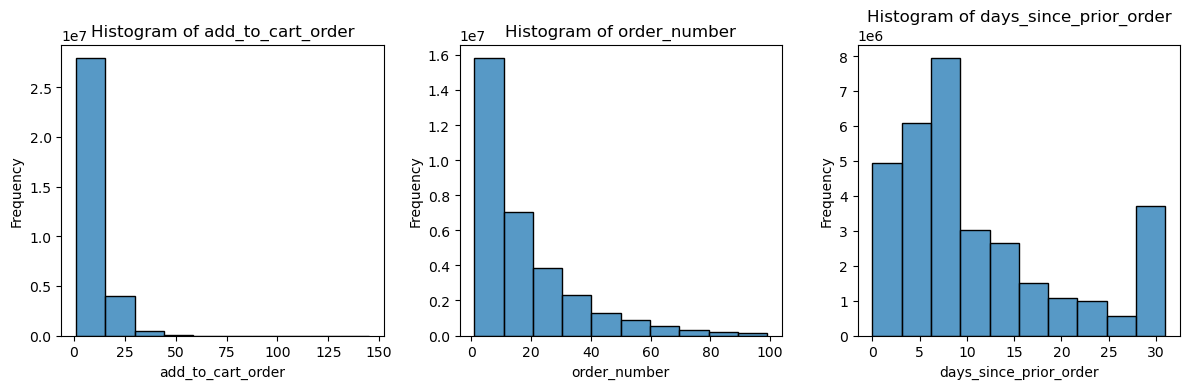

In [71]:

# Specify the columns you want to plot
columns_to_plot = ['add_to_cart_order','order_number','days_since_prior_order']  
# Determine how many rows and columns we need (3 columns per row)
num_columns = 3
num_rows = math.ceil(len(columns_to_plot) / num_columns)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and plot the histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=10, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Insights
- histogram of add_to_cart_order shows maximum values between 0 to 25
- histogram of order_number shows maximum values between 0 to 20
- histogram of days_since_prior_order shows maximum values between 5 to 10

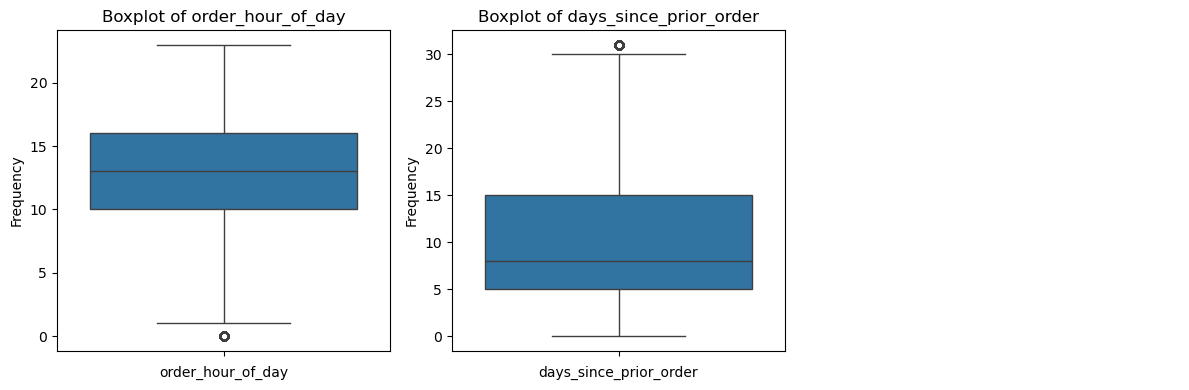

In [132]:

# Specify the columns you want to plot
columns_to_plot = ['order_hour_of_day','days_since_prior_order']  
# Determine how many rows and columns we need (3 columns per row)
num_columns = 3
num_rows = math.ceil(len(columns_to_plot) / num_columns)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and plot the histograms
for i, column in enumerate(columns_to_plot):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### From the histogram we can clearly see there are no outliers present in order_hour_of_day and days_since_prior_order

In [73]:

results = []


columns_to_plot = ['add_to_cart_order', 'order_number', 'order_hour_of_day', 'days_since_prior_order', 'order_dow']


for i in columns_to_plot:
    skew = df[i].skew()
    kur = df[i].kurtosis()
    
    results.append([i, skew, kur])


results_df = pd.DataFrame(results, columns=['column_name', 'skewness', 'kurtosis'])


print(results_df)


              column_name  skewness  kurtosis
0       add_to_cart_order  1.818071  5.643873
1            order_number  1.756896  3.256605
2       order_hour_of_day -0.044083 -0.011658
3  days_since_prior_order  1.020110  0.005736
4               order_dow  0.180193 -1.333989


### Insights
- add_to_cart_order,order_number,days_since_prior_order has a positive skewness
- order_hour_of_day is left skewed
- order_dow is slightly skewed
- add_to_cart_order,order_number are leptokurtic
- order_hour_of_day,days_since_prior_order,order_dow are platykurtic

In [74]:
import pandas as pd

def stratified_sample(df, stratify_col, frac):
    
    stratified_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42))

    stratified_df = stratified_df.reset_index(drop=True)
    
    return stratified_df


stratified_df = stratified_sample(df, 'product_name', frac=0.1)


print(stratified_df)


/var/folders/w9/lzs1tl3s5tb72qgjdzwz797h0000gn/T/ipykernel_4096/892332130.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42))


         product_id                              product_name  aisle_id  \
0             25773                         #2 Coffee Filters        26   
1             25773                         #2 Coffee Filters        26   
2             25773                         #2 Coffee Filters        26   
3             25773                         #2 Coffee Filters        26   
4             25773                         #2 Coffee Filters        26   
...             ...                                       ...       ...   
3243142        2987  with a Splash of Pineapple Coconut Water        98   
3243143        2987  with a Splash of Pineapple Coconut Water        98   
3243144        2987  with a Splash of Pineapple Coconut Water        98   
3243145        2987  with a Splash of Pineapple Coconut Water        98   
3243146        2987  with a Splash of Pineapple Coconut Water        98   

         department_id department          aisle  order_id  add_to_cart_order  \
0                 

In [75]:
stratified_df

product_id                              product_name  aisle_id  \
0             25773                         #2 Coffee Filters        26   
1             25773                         #2 Coffee Filters        26   
2             25773                         #2 Coffee Filters        26   
3             25773                         #2 Coffee Filters        26   
4             25773                         #2 Coffee Filters        26   
...             ...                                       ...       ...   
3243142        2987  with a Splash of Pineapple Coconut Water        98   
3243143        2987  with a Splash of Pineapple Coconut Water        98   
3243144        2987  with a Splash of Pineapple Coconut Water        98   
3243145        2987  with a Splash of Pineapple Coconut Water        98   
3243146        2987  with a Splash of Pineapple Coconut Water        98   

         department_id department          aisle  order_id  add_to_cart_order  \
0                    7  beverages         coffee   2434116                  2   
1                    7  beverages         coffee   2314839                  1   
2                    7  beverages         coffee   2632180                 17   
3                    7  beverages         coffee    541991                 13   
4                    7  beverages         coffee   2520810                  4   
...                ...        ...            ...       ...                ...   
3243142              7  beverages  juice nectars   1344238                 20   
3243143              7  beverages  juice nectars   2956621                 11   
3243144              7  beverages  juice nectars   3189915                  5   
3243145              7  beverages  juice nectars    736980                  3   
3243146              7  beverages  juice nectars   2973699                  8   

         reordered  user_id  order_number  order_dow  order_hour_of_day  \
0                0    64923             6          2                 13   
1                1   195887            22          6                 10   
2                0   138985             3          3                 14   
3                0    95635             2          6                  7   
4                0   180592             9          2                 14   
...            ...      ...           ...        ...                ...   
3243142          0   168386            12          6                 13   
3243143          1   179968             4          6                  8   
3243144          1    42287            26          2                 16   
3243145          1    74898            23          1                 13   
3243146          0    15004            14          6                 15   

         days_since_prior_order  
0                           7.0  
1                           6.0  
2                           7.0  
3                          18.0  
4                          15.0  
...                         ...  
3243142                    11.0  
3243143                     5.0  
3243144                     5.0  
3243145                    31.0  
3243146                    28.0  

[3243147 rows x 14 columns]

### Performed stratified sampling as the dataset is huge and due to resoruce constraints it would be difficult to perform EDA

In [76]:
#sample_size = 4000000
#df_sample = df.sample(n=sample_size, random_state=42)

Text(0, 0.5, 'Count')

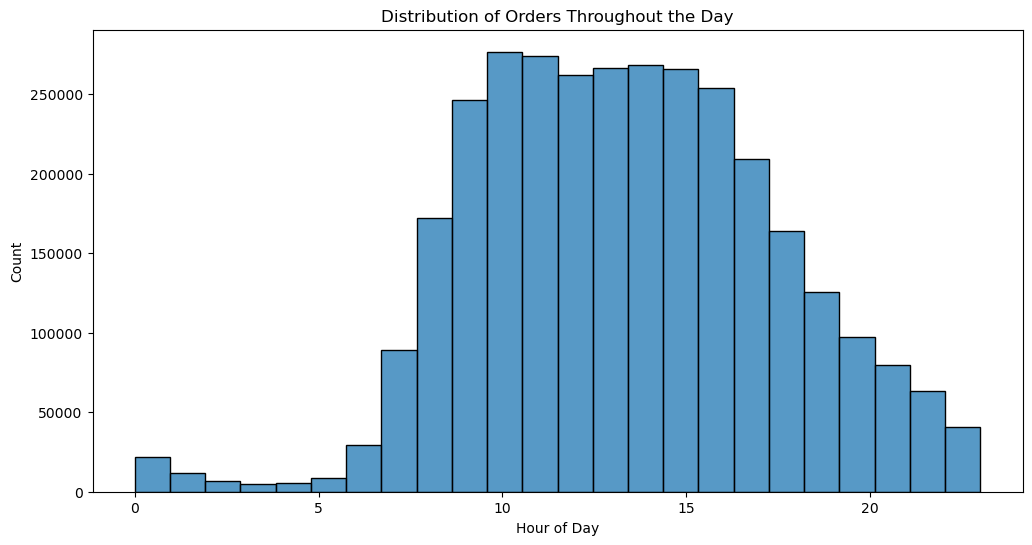

In [77]:
# Order Hour Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=stratified_df, x='order_hour_of_day', bins=24)
plt.title('Distribution of Orders Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

### We can see that the count increases as time increases reaching the maximum at around 10. The graph starts decreasing again after 15 

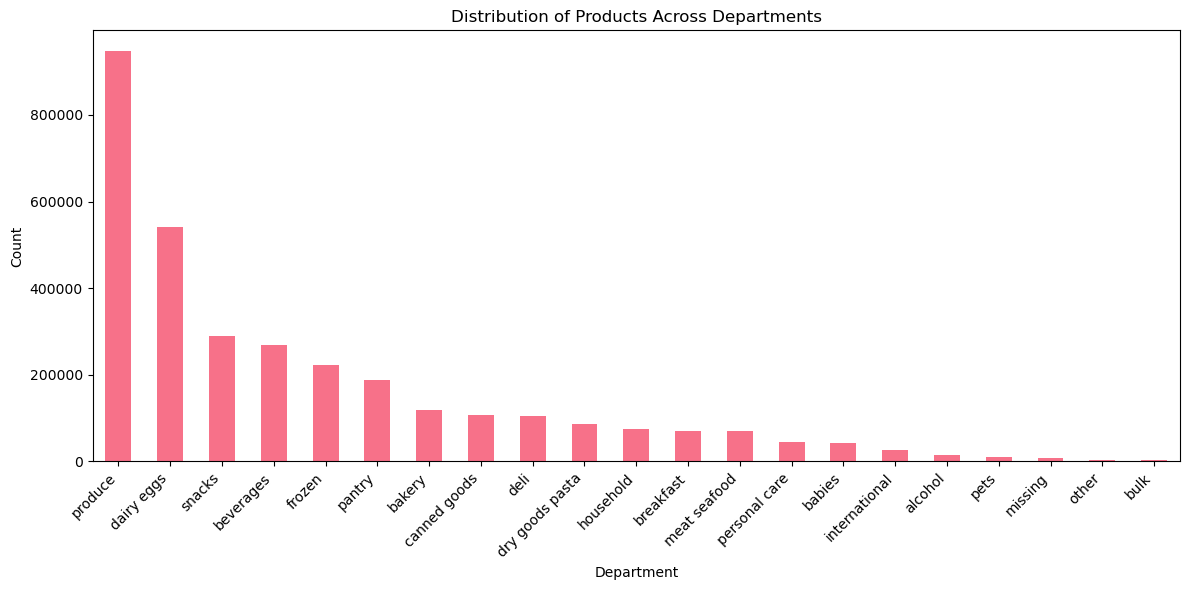

In [78]:
colors = sns.color_palette("husl", 8)
plt.figure(figsize=(12, 6))
dept_counts = stratified_df['department'].value_counts()
dept_plot = dept_counts.plot(kind='bar', color=colors[0])
plt.title('Distribution of Products Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### count of the prodcuts in the department with produce being the highest 

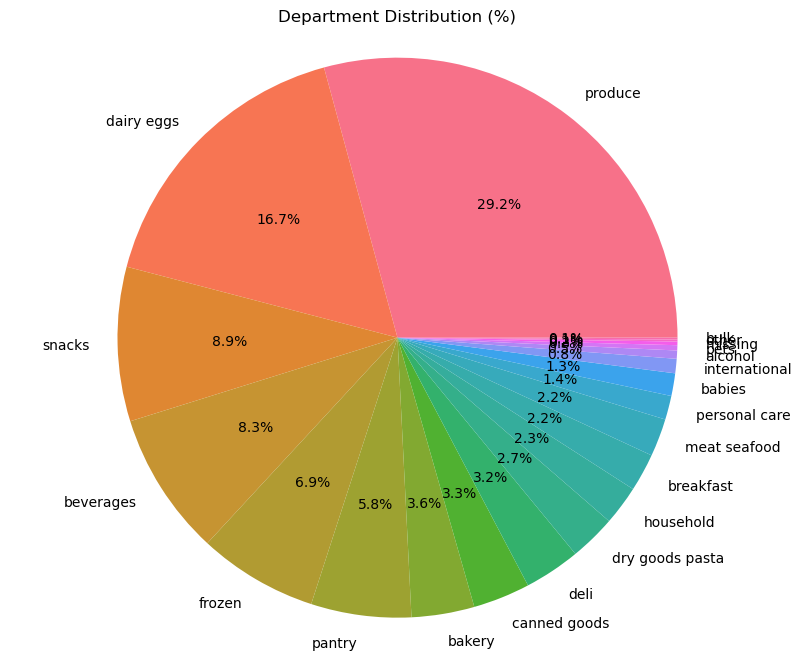

In [79]:
plt.figure(figsize=(10, 8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("husl", len(dept_counts)))
plt.title('Department Distribution (%)')
plt.axis('equal')
plt.show()

### pie chart representation of the department count

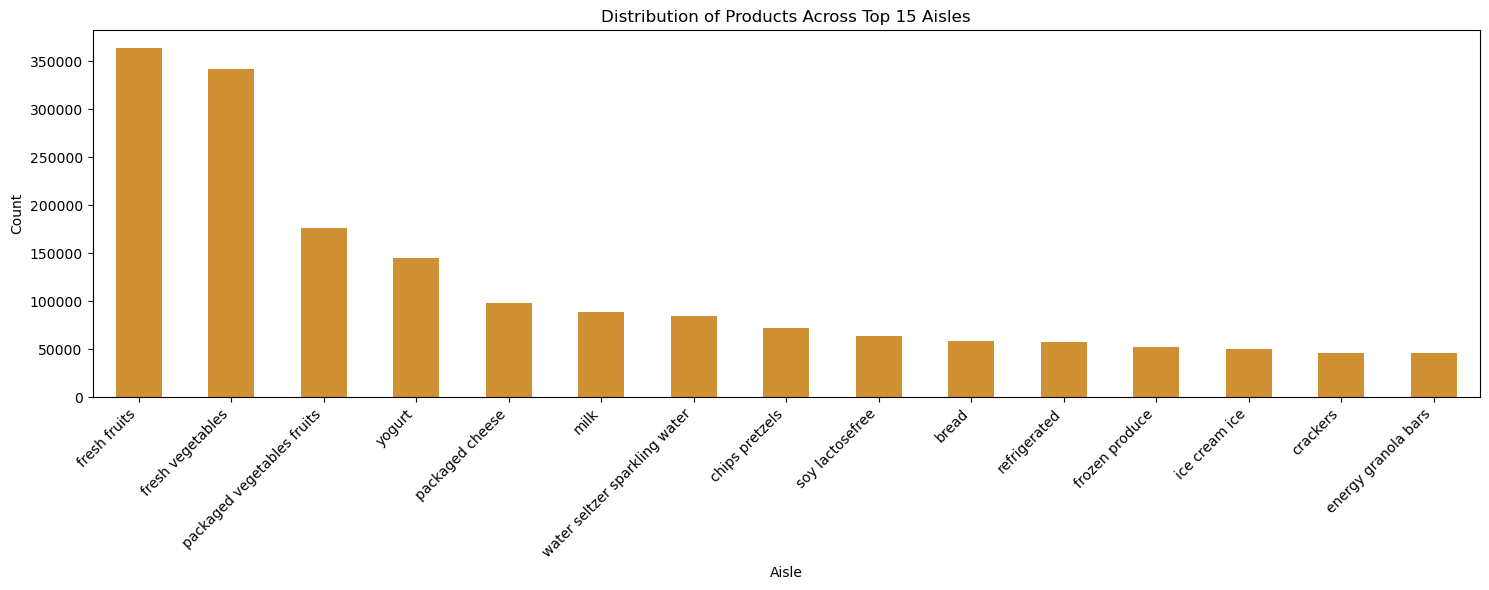

In [80]:
plt.figure(figsize=(15, 6))
aisle_counts = stratified_df['aisle'].value_counts().head(15)
aisle_plot = aisle_counts.plot(kind='bar', color=colors[1])
plt.title('Distribution of Products Across Top 15 Aisles')
plt.xlabel('Aisle')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Aisle analysis with fresh fruits having the highest count

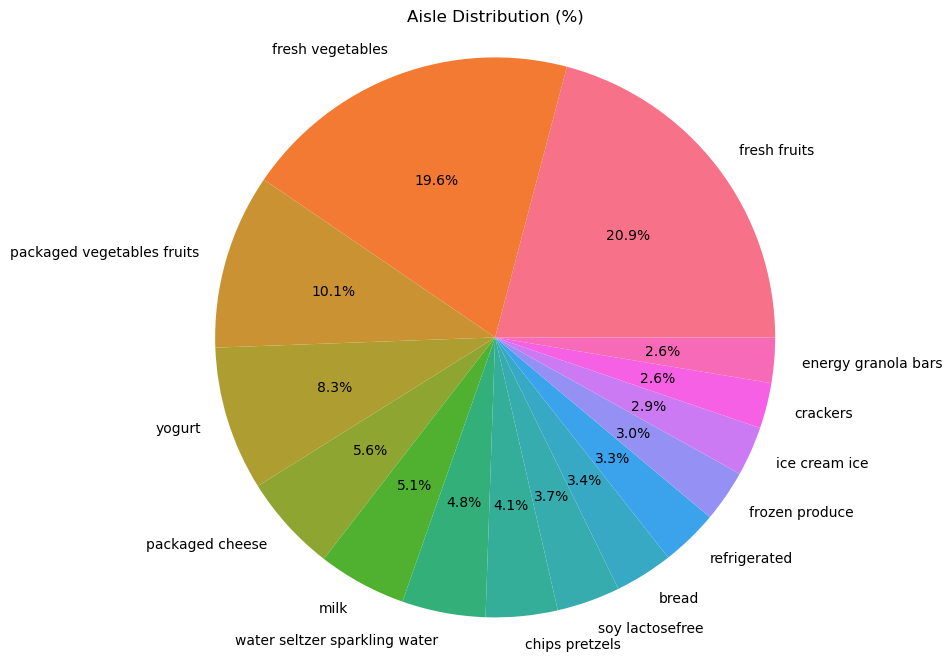

In [81]:
plt.figure(figsize=(10, 8))
plt.pie(aisle_counts, labels=aisle_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("husl", len(aisle_counts)))
plt.title('Aisle Distribution (%)')
plt.axis('equal')
plt.show()

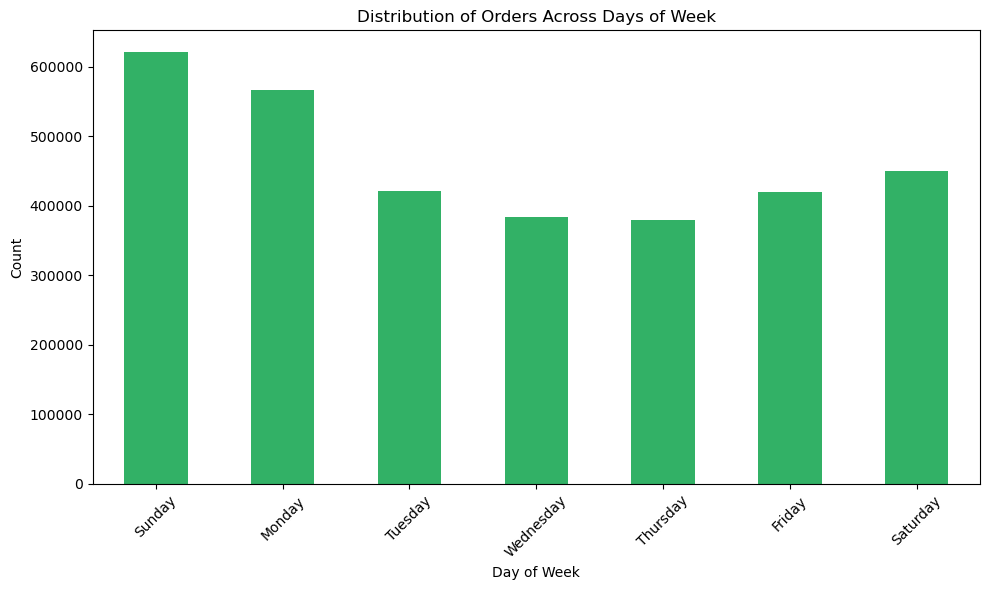

In [82]:
plt.figure(figsize=(10, 6))
dow_counts = stratified_df['order_dow'].value_counts().sort_index()
dow_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_plot = dow_counts.plot(kind='bar', color=colors[3])
plt.title('Distribution of Orders Across Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(range(7), dow_names, rotation=45)
plt.tight_layout()
plt.show()

### count of orders across each day of week with Sunday having the highest count

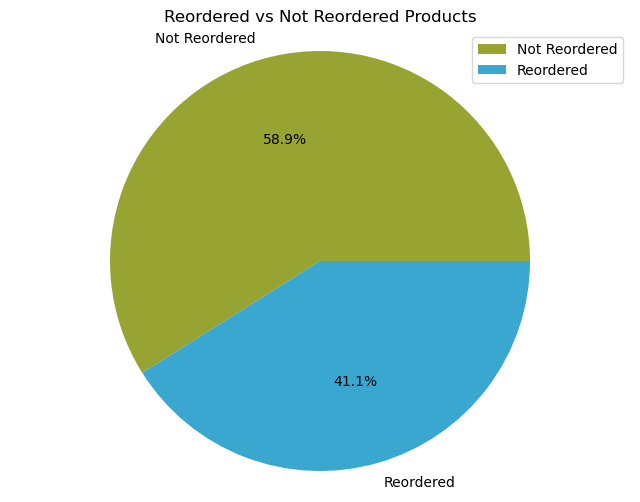

In [83]:
plt.figure(figsize=(8, 6))
reorder_counts = stratified_df['reordered'].value_counts()
plt.pie(reorder_counts, labels=['Not Reordered', 'Reordered'], 
        autopct='%1.1f%%', colors=[colors[2], colors[5]])
plt.title('Reordered vs Not Reordered Products')
plt.legend()
plt.axis('equal')
plt.show()

### pie chart showing the percentage of reordered products

In [84]:
print("\nDetailed Value Counts and Percentages:")
for column in ['department', 'aisle', 'reordered']:
    print(f"\n{column.upper()} Distribution:")
    counts = stratified_df[column].value_counts()
    percentages = (counts/len(stratified_df)*100).round(2)
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(summary)


Detailed Value Counts and Percentages:

DEPARTMENT Distribution:
                  Count  Percentage
department                         
produce          947921       29.23
dairy eggs       541387       16.69
snacks           288697        8.90
beverages        268996        8.29
frozen           223645        6.90
pantry           187532        5.78
bakery           117665        3.63
canned goods     106790        3.29
deli             105094        3.24
dry goods pasta   86653        2.67
household         73849        2.28
breakfast         70964        2.19
meat seafood      70893        2.19
personal care     44689        1.38
babies            42390        1.31
international     26927        0.83
alcohol           15348        0.47
pets               9756        0.30
missing            6869        0.21
other              3626        0.11
bulk               3456        0.11

AISLE Distribution:
                             Count  Percentage
aisle                                 

### value counts and percentage of department,aisle and reordered

### Bivariate analysis

<Axes: xlabel='days_since_prior_order', ylabel='order_number'>

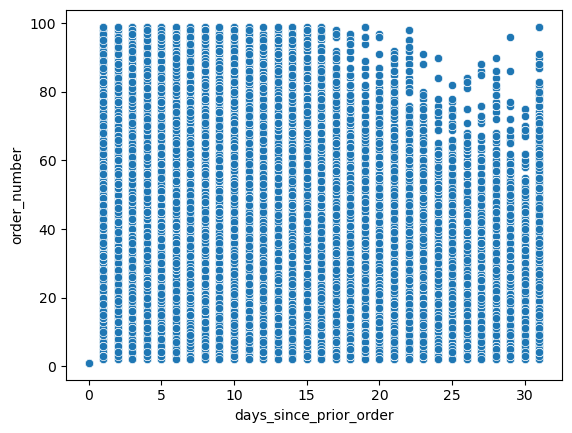

In [85]:
sns.scatterplot(data=stratified_df,x='days_since_prior_order',y='order_number')

### No correlation between 2 groups due to discrete nature of numerical variables

/var/folders/w9/lzs1tl3s5tb72qgjdzwz797h0000gn/T/ipykernel_4096/373820422.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/homebrew/anaconda3/envs/Project/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


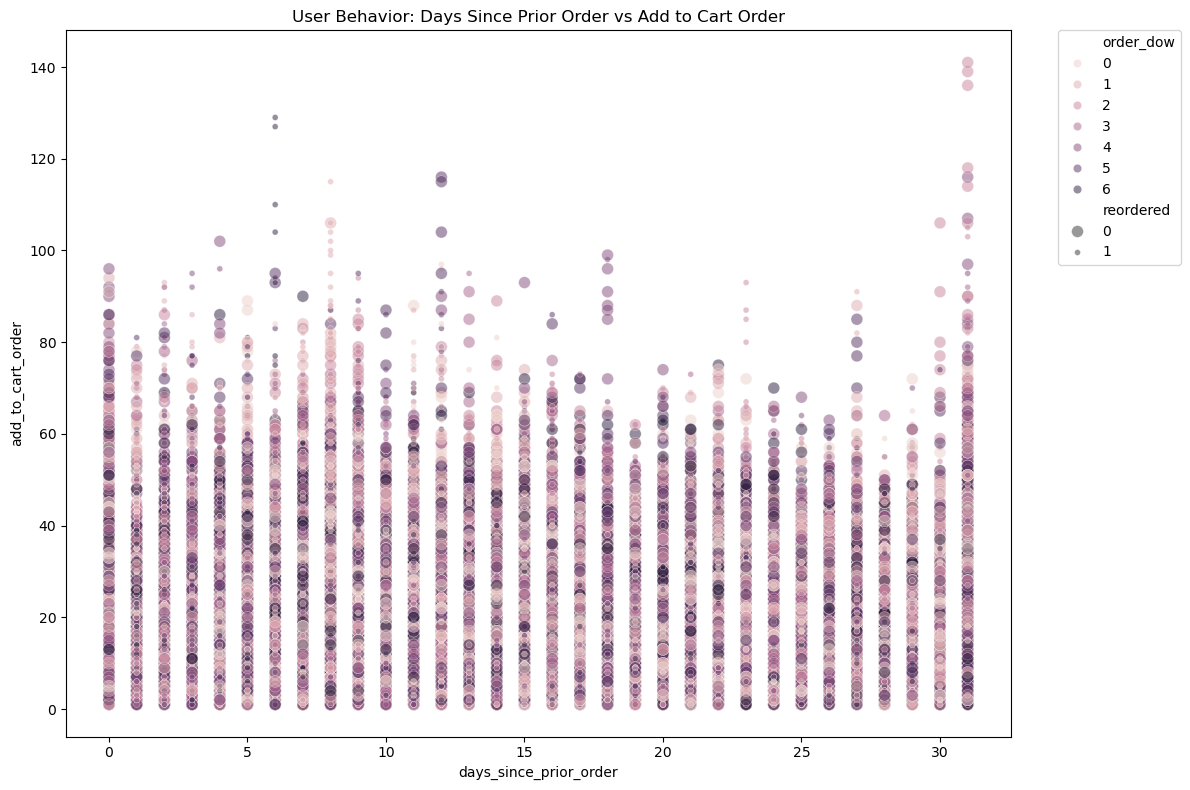

In [86]:
# User behavior analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stratified_df, 
                x='days_since_prior_order', 
                y='add_to_cart_order',
                hue='order_dow',
                size='reordered',
                alpha=0.5)
plt.title('User Behavior: Days Since Prior Order vs Add to Cart Order')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

In [87]:
stratified_df

product_id                              product_name  aisle_id  \
0             25773                         #2 Coffee Filters        26   
1             25773                         #2 Coffee Filters        26   
2             25773                         #2 Coffee Filters        26   
3             25773                         #2 Coffee Filters        26   
4             25773                         #2 Coffee Filters        26   
...             ...                                       ...       ...   
3243142        2987  with a Splash of Pineapple Coconut Water        98   
3243143        2987  with a Splash of Pineapple Coconut Water        98   
3243144        2987  with a Splash of Pineapple Coconut Water        98   
3243145        2987  with a Splash of Pineapple Coconut Water        98   
3243146        2987  with a Splash of Pineapple Coconut Water        98   

         department_id department          aisle  order_id  add_to_cart_order  \
0                    7  beverages         coffee   2434116                  2   
1                    7  beverages         coffee   2314839                  1   
2                    7  beverages         coffee   2632180                 17   
3                    7  beverages         coffee    541991                 13   
4                    7  beverages         coffee   2520810                  4   
...                ...        ...            ...       ...                ...   
3243142              7  beverages  juice nectars   1344238                 20   
3243143              7  beverages  juice nectars   2956621                 11   
3243144              7  beverages  juice nectars   3189915                  5   
3243145              7  beverages  juice nectars    736980                  3   
3243146              7  beverages  juice nectars   2973699                  8   

         reordered  user_id  order_number  order_dow  order_hour_of_day  \
0                0    64923             6          2                 13   
1                1   195887            22          6                 10   
2                0   138985             3          3                 14   
3                0    95635             2          6                  7   
4                0   180592             9          2                 14   
...            ...      ...           ...        ...                ...   
3243142          0   168386            12          6                 13   
3243143          1   179968             4          6                  8   
3243144          1    42287            26          2                 16   
3243145          1    74898            23          1                 13   
3243146          0    15004            14          6                 15   

         days_since_prior_order  
0                           7.0  
1                           6.0  
2                           7.0  
3                          18.0  
4                          15.0  
...                         ...  
3243142                    11.0  
3243143                     5.0  
3243144                     5.0  
3243145                    31.0  
3243146                    28.0  

[3243147 rows x 14 columns]

In [88]:

product = pd.crosstab(stratified_df['product_id'], stratified_df['reordered'])
product

reordered    0    1
product_id         
1           68  117
2            7    2
3            6   22
4           21   12
5            1    1
...         ..  ...
49684        1    0
49685        4    1
49686        3    9
49687        1    0
49688        6    3

[46506 rows x 2 columns]

In [120]:
stratified_df[stratified_df['product_id']==1]

product_id                product_name  aisle_id  department_id  \
494764           1  Chocolate Sandwich Cookies        61             19   
494765           1  Chocolate Sandwich Cookies        61             19   
494766           1  Chocolate Sandwich Cookies        61             19   
494767           1  Chocolate Sandwich Cookies        61             19   
494768           1  Chocolate Sandwich Cookies        61             19   
...            ...                         ...       ...            ...   
494944           1  Chocolate Sandwich Cookies        61             19   
494945           1  Chocolate Sandwich Cookies        61             19   
494946           1  Chocolate Sandwich Cookies        61             19   
494947           1  Chocolate Sandwich Cookies        61             19   
494948           1  Chocolate Sandwich Cookies        61             19   

       department          aisle  order_id  add_to_cart_order  reordered  \
494764     snacks  cookies cakes    438077                  4          0   
494765     snacks  cookies cakes    839897                  1          1   
494766     snacks  cookies cakes   2287116                  2          0   
494767     snacks  cookies cakes   3128133                 14          0   
494768     snacks  cookies cakes    765824                  4          0   
...           ...            ...       ...                ...        ...   
494944     snacks  cookies cakes   3387149                  4          1   
494945     snacks  cookies cakes   1682289                  9          1   
494946     snacks  cookies cakes   2067429                  3          0   
494947     snacks  cookies cakes    268206                  6          1   
494948     snacks  cookies cakes   1706257                  3          1   

        user_id  ...  order_dow  order_hour_of_day  days_since_prior_order  \
494764   149488  ...          6                 14                    16.0   
494765    57938  ...          4                 16                    13.0   
494766   175446  ...          2                 15                     6.0   
494767    15175  ...          5                 11                     8.0   
494768    62672  ...          1                 11                     4.0   
...         ...  ...        ...                ...                     ...   
494944   106854  ...          5                 15                     6.0   
494945    96604  ...          4                 14                     7.0   
494946    47549  ...          6                 14                     9.0   
494947   196224  ...          1                 12                     3.0   
494948    11448  ...          0                 13                    31.0   

        hour_dow_interaction  cart_order_day_interaction  time_of_day  \
494764                    84                          24    Afternoon   
494765                    64                           4    Afternoon   
494766                    30                           4    Afternoon   
494767                    55                          70      Morning   
494768                    11                           4      Morning   
...                      ...                         ...          ...   
494944                    75                          20    Afternoon   
494945                    56                          36    Afternoon   
494946                    84                          18    Afternoon   
494947                    12                           6    Afternoon   
494948                     0                           0    Afternoon   

           customer_type   cart_position     order_recency     peak_category  
494764  Regular Customer  Second Quarter      Within Month      Weekend Peak  
494765    Loyal Customer   First Quarter  Within Fortnight  Weekday Off-Peak  
494766      New Customer   First Quarter       Within Week  Weekday Off-Peak  
494767  Regular Customer    Last Quarter  Within Fortnight      

### No correlation between 2 groups due to discrete nature of numerical variables

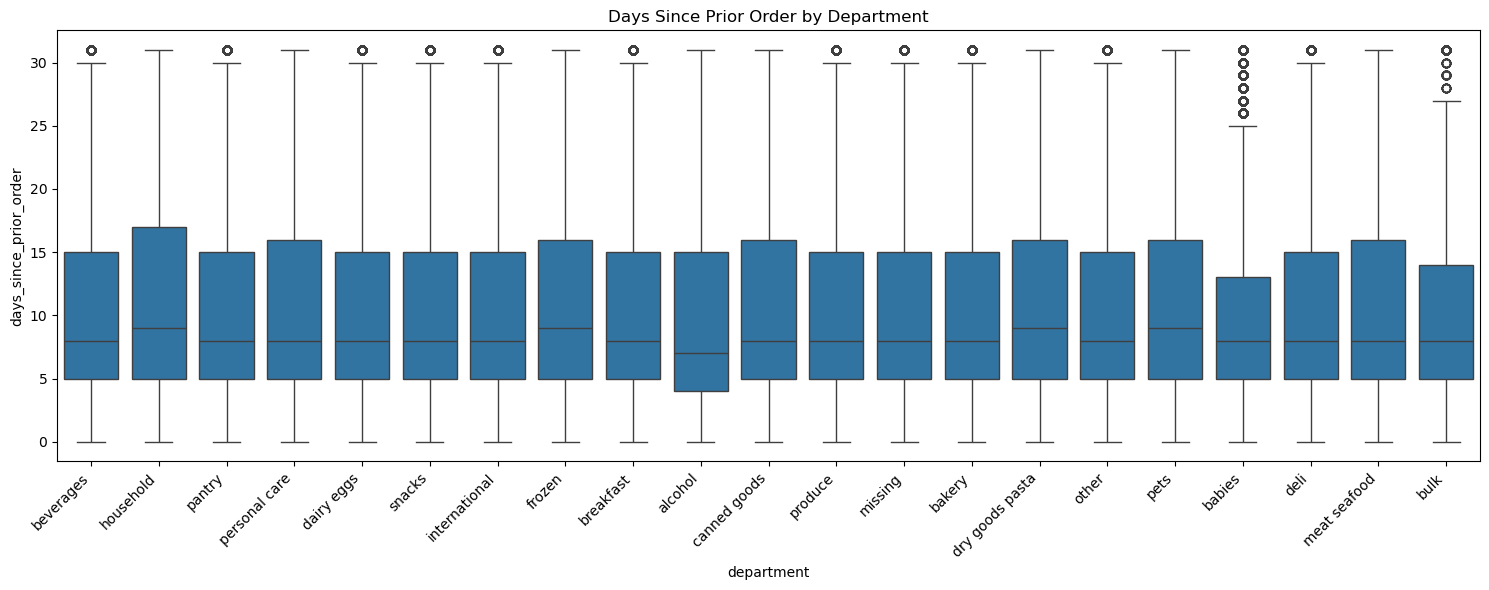

In [89]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=stratified_df, x='department', y='days_since_prior_order')
plt.xticks(rotation=45, ha='right')
plt.title('Days Since Prior Order by Department')
plt.tight_layout()
plt.show()

### box plot between Department and days_since_prior_order showing few outliers present in babies,missing and other could be due to infrequent purchasing pattern

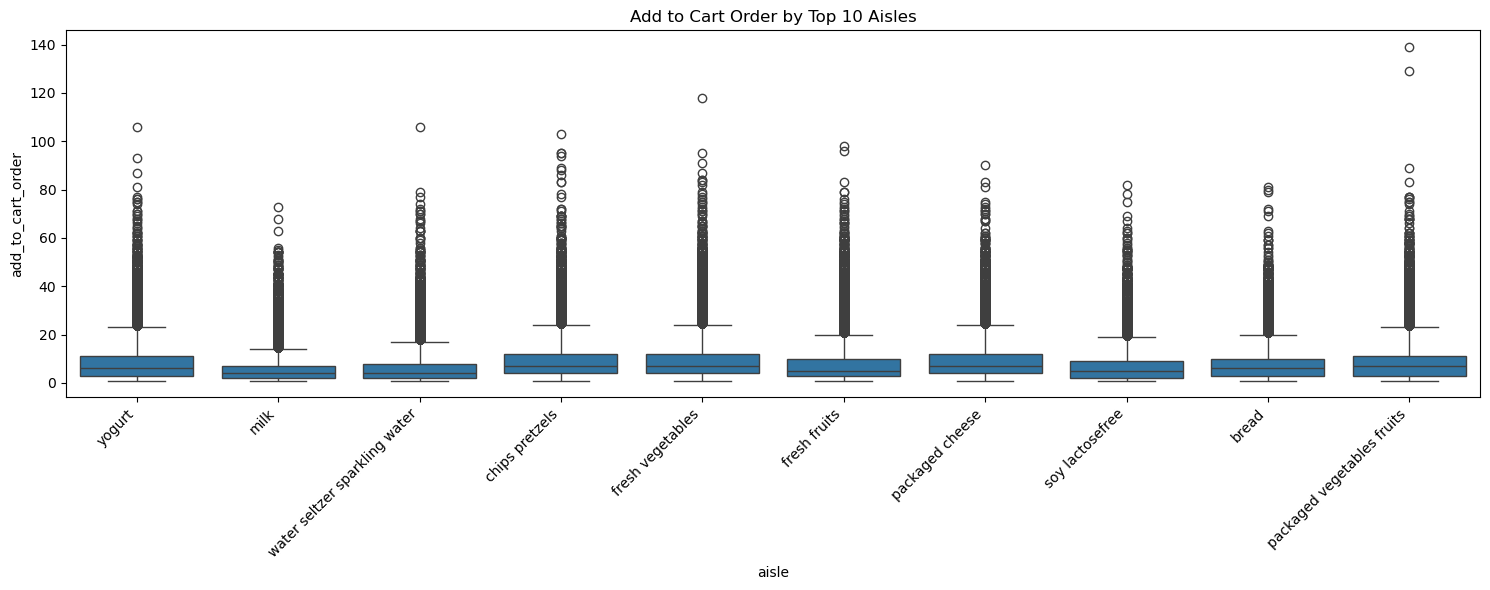

In [90]:
top_aisles = stratified_df['aisle'].value_counts().head(10).index
df_top_aisles = stratified_df[stratified_df['aisle'].isin(top_aisles)]

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_aisles, x='aisle', y='add_to_cart_order')
plt.xticks(rotation=45, ha='right')
plt.title('Add to Cart Order by Top 10 Aisles')
plt.tight_layout()
plt.show()


### box plot between Top aisles and add_to_cart_order showcasing significant outliers present 

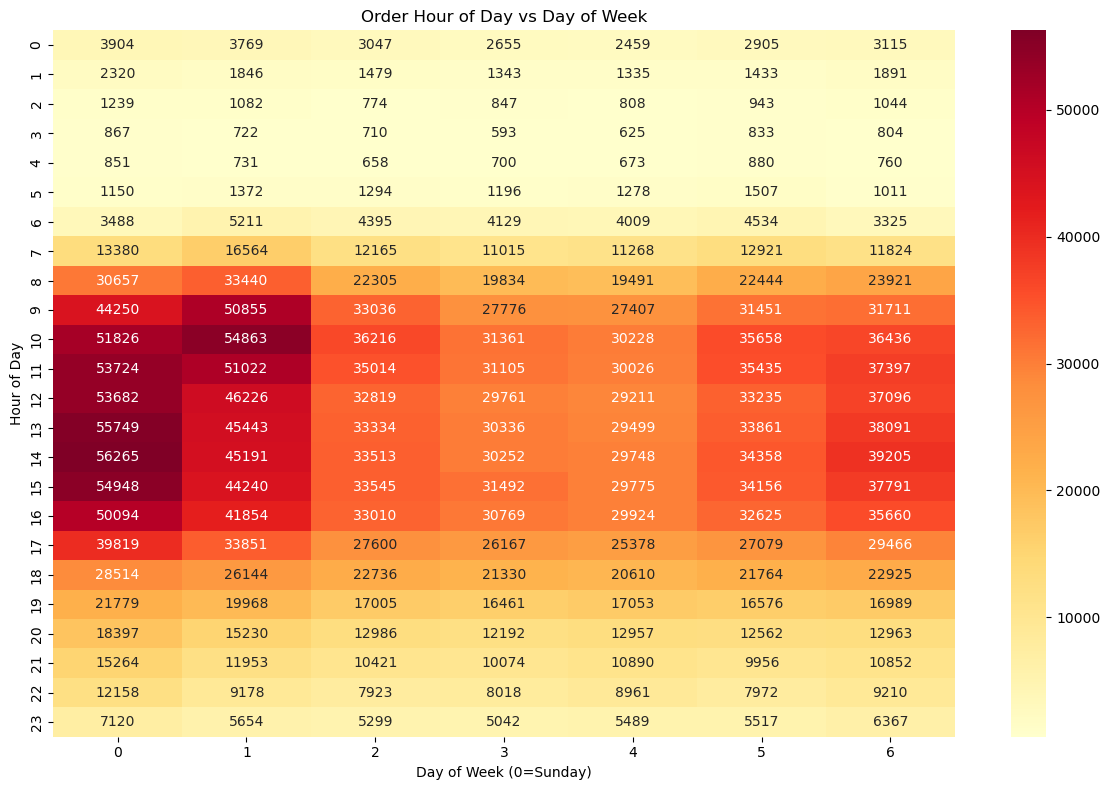

In [91]:
order_time_dow = pd.crosstab(stratified_df['order_hour_of_day'], stratified_df['order_dow'])
plt.figure(figsize=(12, 8))
sns.heatmap(order_time_dow, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Order Hour of Day vs Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

### order hour and day of week heatmap showing that Sunday is the day with most orders and from 11 to 15 the orders are maximum

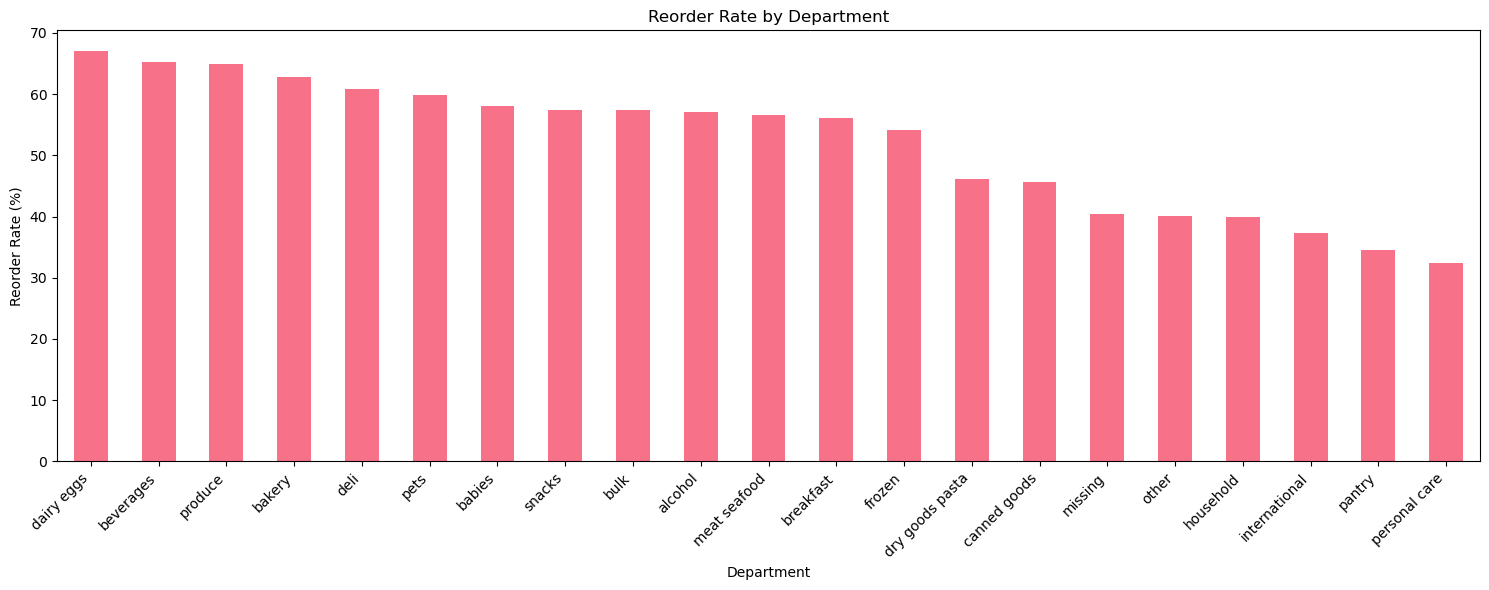

In [92]:
# Categorical vs Categorical Analysis

# Department vs Reordered
dept_reorder = pd.crosstab(stratified_df['department'], stratified_df['reordered'], normalize='index') * 100
plt.figure(figsize=(15, 6))
dept_reorder[1].sort_values(ascending=False).plot(kind='bar', color=colors[0])
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### shows the department and reordered rate with dairy eggs being the most reordred item 

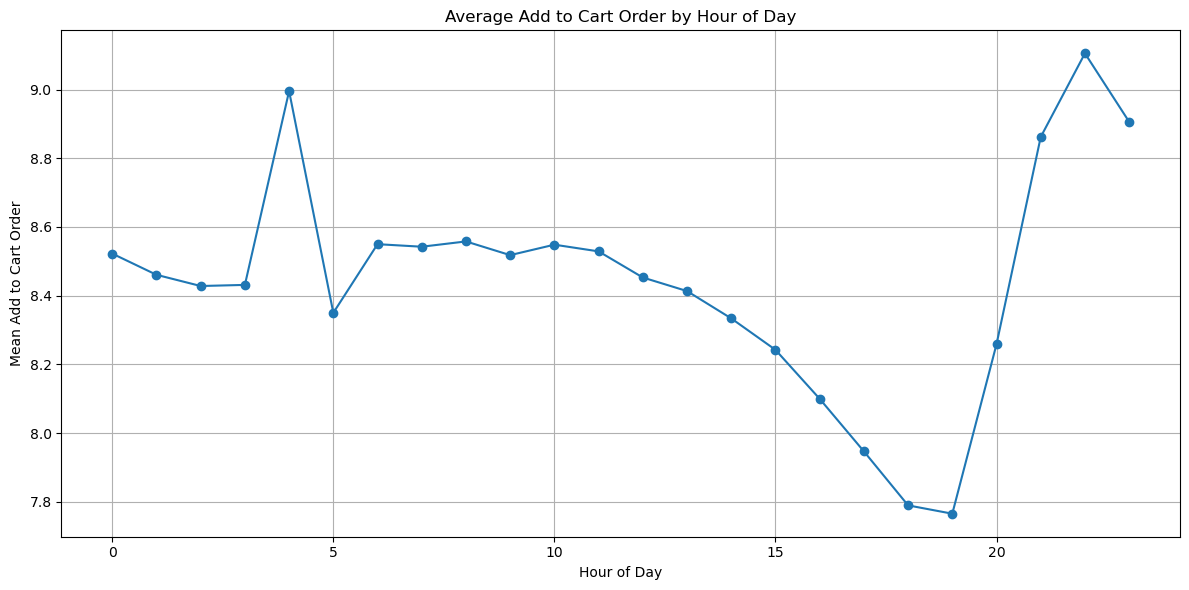

In [93]:
# Mean add_to_cart_order by hour
plt.figure(figsize=(12, 6))
mean_cart_order = stratified_df.groupby('order_hour_of_day')['add_to_cart_order'].mean()
mean_cart_order.plot(kind='line', marker='o')
plt.title('Average Add to Cart Order by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Add to Cart Order')
plt.grid(True)
plt.tight_layout()
plt.show()

### plot of mean of add_to_cart and hour of day with a peak before 5 then decreases and again goes up after 15

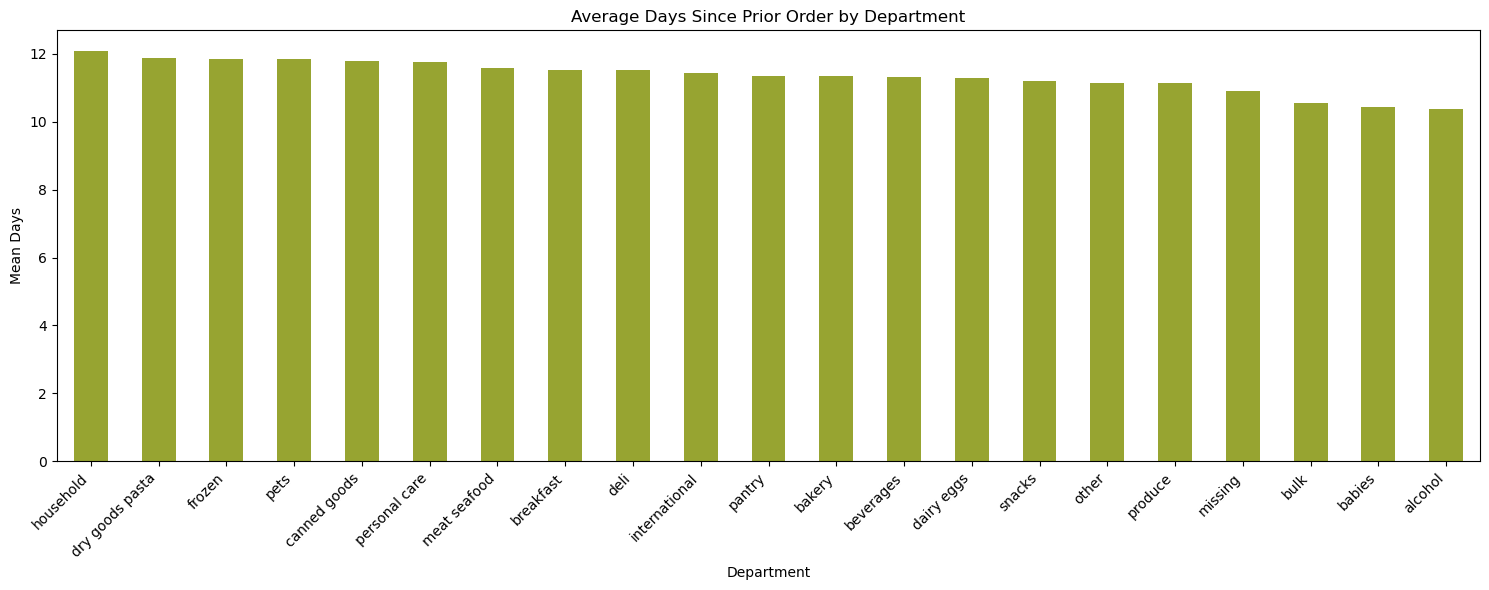

In [94]:
# Mean days_since_prior_order by department
plt.figure(figsize=(15, 6))
mean_days = stratified_df.groupby('department')['days_since_prior_order'].mean().sort_values(ascending=False)
mean_days.plot(kind='bar', color=colors[2])
plt.title('Average Days Since Prior Order by Department')
plt.xlabel('Department')
plt.ylabel('Mean Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### shows count plot of mean days and department show household recevied the highest mean days since prior order

In [95]:
print("\nSummary Statistics by Department:")
dept_summary = stratified_df.groupby('department').agg({
    'days_since_prior_order': ['mean', 'std'],
    'add_to_cart_order': ['mean', 'std'],
    'reordered': ['mean', 'count']
}).round(2)
print(dept_summary)


Summary Statistics by Department:
                days_since_prior_order       add_to_cart_order        \
                                  mean   std              mean   std   
department                                                             
alcohol                          10.37  9.22              5.39  5.70   
babies                           10.42  8.26             10.56  8.12   
bakery                           11.34  8.98              8.10  6.91   
beverages                        11.31  9.03              6.97  6.68   
breakfast                        11.53  9.03              9.17  7.66   
bulk                             10.53  8.55              8.41  6.93   
canned goods                     11.79  9.25              9.94  7.64   
dairy eggs                       11.27  8.88              7.50  6.62   
deli                             11.51  9.06              8.72  7.16   
dry goods pasta                  11.88  9.31             10.22  7.72   
frozen                       

### summary statistics of department and reordered

### Multivariate analysis

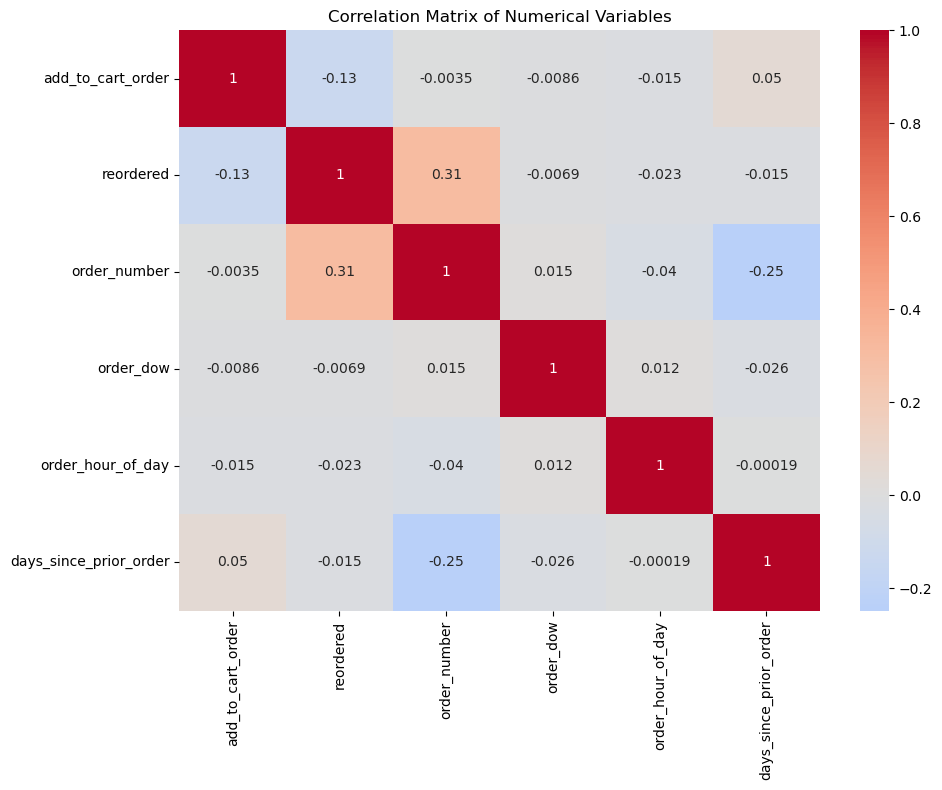

In [96]:
# correlation matrix for numerical variables
numerical_cols = ['add_to_cart_order', 'reordered', 'order_number', 
                 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
correlation_matrix = stratified_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

### the heatmap of numerical cols shows absence of high correlation

In [97]:

def print_test_results(test_name, statistic, p_value):
    print(f"\n{test_name}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant at 0.05 level: {p_value < 0.05}")

# ANOVA test for days_since_prior_order across departments
departments = stratified_df['department'].unique()
days_by_dept = [stratified_df[stratified_df['department'] == dept]['days_since_prior_order'].dropna() 
                for dept in departments]
f_stat, p_val = f_oneway(*days_by_dept)
print_test_results("ANOVA Test: Days Since Prior Order across Departments", f_stat, p_val)

# Kruskal-Wallis H-test (non-parametric alternative to ANOVA)
h_stat, p_val = scipy.stats.kruskal(*days_by_dept)
print_test_results("Kruskal-Wallis H-test: Days Since Prior Order across Departments", h_stat, p_val)

# Chi-square test for department vs reordered
dept_reorder_counts = pd.crosstab(stratified_df['department'], stratified_df['reordered'])
chi2, p_value, dof, expected = chi2_contingency(dept_reorder_counts)
print("\nChi-square test results for Department vs Reordered:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")
print(f"Significant at 0.05 level: {p_value < 0.05}")


ANOVA Test: Days Since Prior Order across Departments:
Statistic: 165.0116
P-value: 0.0000
Significant at 0.05 level: True

Kruskal-Wallis H-test: Days Since Prior Order across Departments:
Statistic: 2926.5895
P-value: 0.0000
Significant at 0.05 level: True

Chi-square test results for Department vs Reordered:
Chi-square statistic: 127520.84
p-value: 0.0000000000
Significant at 0.05 level: True


In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'stratified_df' has columns 'days_since_prior_order' and 'department'
# Fit the model for ANOVA
model = ols('days_since_prior_order ~ C(department)', data=stratified_df).fit()

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(stratified_df['days_since_prior_order'], stratified_df['department'], alpha=0.05)

# Print the results
print(tukey_result)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
        alcohol          babies   0.0516    1.0 -0.2509  0.3541  False
        alcohol          bakery   0.9661    0.0  0.6905  1.2416   True
        alcohol       beverages   0.9422    0.0  0.6757  1.2087   True
        alcohol       breakfast    1.157    0.0  0.8711  1.4428   True
        alcohol            bulk   0.1597    1.0 -0.4449  0.7642  False
        alcohol    canned goods   1.4183    0.0  1.1411  1.6955   True
        alcohol      dairy eggs   0.8987    0.0  0.6359  1.1615   True
        alcohol            deli   1.1359    0.0  0.8584  1.4133   True
        alcohol dry goods pasta   1.5101    0.0  1.2289  1.7913   True
        alcohol          frozen   1.4614    0.0  1.1935  1.7293   True
        alcohol       household   1.7082    0.0  1.4233   1.993   True
      

In [128]:
# Create a contingency table (cross-tabulation) for Department vs Reordered
contingency_table = pd.crosstab(stratified_df['department'], stratified_df['reordered'])

# Display the contingency table
print(contingency_table)


reordered             0       1
department                     
alcohol            6600    8748
babies            17772   24618
bakery            43856   73809
beverages         93426  175570
breakfast         31134   39830
bulk               1475    1981
canned goods      58082   48708
dairy eggs       178393  362994
deli              41136   63958
dry goods pasta   46656   39997
frozen           102519  121126
household         44314   29535
international     16887   10040
meat seafood      30790   40103
missing            4098    2771
other              2173    1453
pantry           122720   64812
personal care     30232   14457
pets               3922    5834
produce          332233  615688
snacks           123153  165544


In [129]:
# The Chi-square test also provides expected frequencies
print("Expected frequencies:")
print(expected)


Expected frequencies:
[[  6301.5804427    9046.4195573 ]
 [ 17404.48234076  24985.51765924]
 [ 48310.88498764  69354.11501236]
 [110444.35319028 158551.64680972]
 [ 29136.39265935  41827.60734065]
 [  1418.96416536   2037.03583464]
 [ 43845.82847771  62944.17152229]
 [222282.62517148 319104.37482852]
 [ 43149.48495212  61944.51504788]
 [ 35577.98085101  51075.01914899]
 [ 91824.14373909 131820.85626091]
 [ 30320.9156967   43528.0843033 ]
 [ 11055.68520853  15871.31479147]
 [ 29107.24148582  41785.75851418]
 [  2820.27339464   4048.72660536]
 [  1488.76274988   2137.23725012]
 [ 76996.87148686 110535.12851314]
 [ 18348.40555146  26340.59444854]
 [  4005.6175918    5750.3824082 ]
 [389197.31788013 558723.68211987]
 [118533.18797668 170163.81202332]]


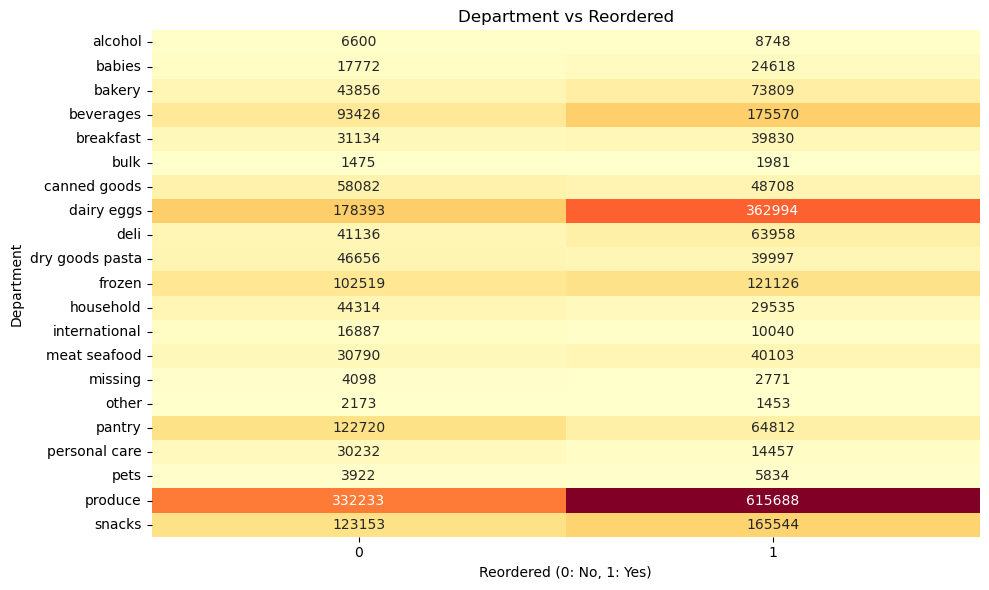

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title('Department vs Reordered')
plt.xlabel('Reordered (0: No, 1: Yes)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


In [131]:
# Convert the contingency table to relative frequencies (percentages)
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(relative_frequencies)


reordered                0          1
department                           
alcohol          43.002346  56.997654
babies           41.924982  58.075018
bakery           37.271916  62.728084
beverages        34.731371  65.268629
breakfast        43.872950  56.127050
bulk             42.679398  57.320602
canned goods     54.388988  45.611012
dairy eggs       32.951105  67.048895
deli             39.142101  60.857899
dry goods pasta  53.842337  46.157663
frozen           45.840059  54.159941
household        60.006229  39.993771
international    62.714005  37.285995
meat seafood     43.431651  56.568349
missing          59.659339  40.340661
other            59.928296  40.071704
pantry           65.439498  34.560502
personal care    67.649757  32.350243
pets             40.200902  59.799098
produce          35.048596  64.951404
snacks           42.658220  57.341780


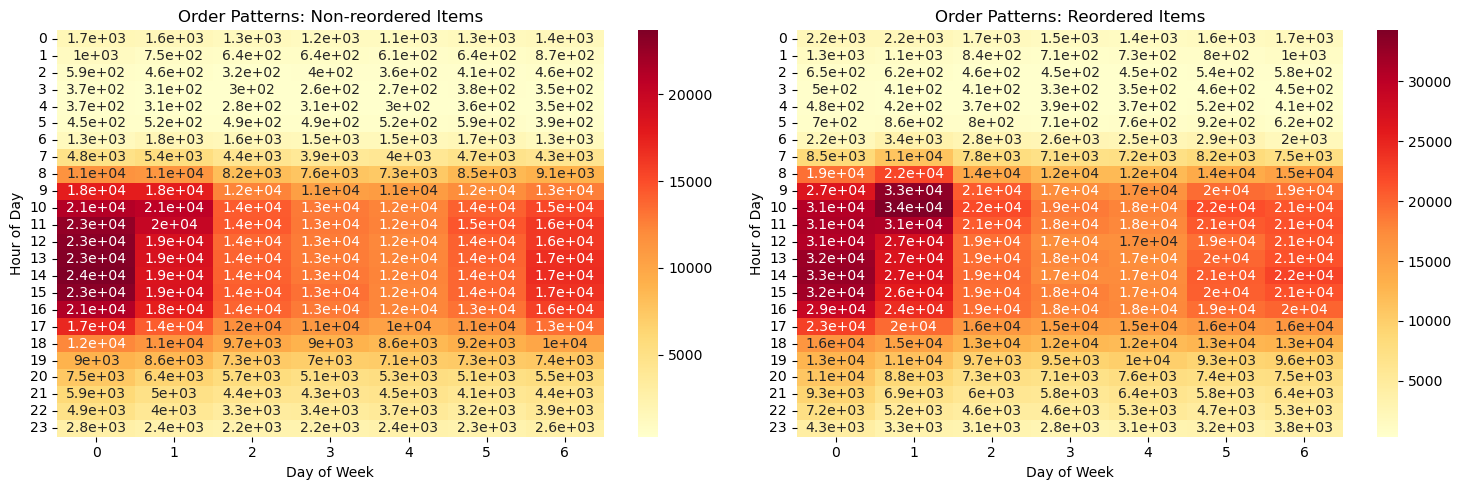

In [98]:
# Time-based patterns
plt.figure(figsize=(15, 5))
plt.subplot(121)
pivot_reordered_0 = pd.crosstab(stratified_df[stratified_df['reordered']==0]['order_hour_of_day'],
                               stratified_df[stratified_df['reordered']==0]['order_dow'])
sns.heatmap(pivot_reordered_0, cmap='YlOrRd',annot=True)
plt.title('Order Patterns: Non-reordered Items')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')

plt.subplot(122)
pivot_reordered_1 = pd.crosstab(stratified_df[stratified_df['reordered']==1]['order_hour_of_day'],
                               stratified_df[stratified_df['reordered']==1]['order_dow'])
sns.heatmap(pivot_reordered_1, cmap='YlOrRd',annot=True)
plt.title('Order Patterns: Reordered Items')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

### hours of day and day of week reorder pattern 

In [99]:
stratified_df['hour_dow_interaction'] = stratified_df['order_hour_of_day'] * stratified_df['order_dow']
stratified_df['cart_order_day_interaction'] = stratified_df['add_to_cart_order'] * stratified_df['order_dow']

def analyze_reorder_probability(df, feature1, feature2, threshold=100):
    pivot = df.groupby([feature1, feature2])['reordered'].agg(['mean', 'count']).reset_index()
    pivot = pivot[pivot['count'] > threshold]  
    
    plt.figure(figsize=(20, 10))
    pivot_table = pivot.pivot(index=feature1, columns=feature2, values='mean')
    sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title(f'Reorder Probability: {feature1} vs {feature2}')
    plt.tight_layout()
    plt.show()
    
    return pivot_table

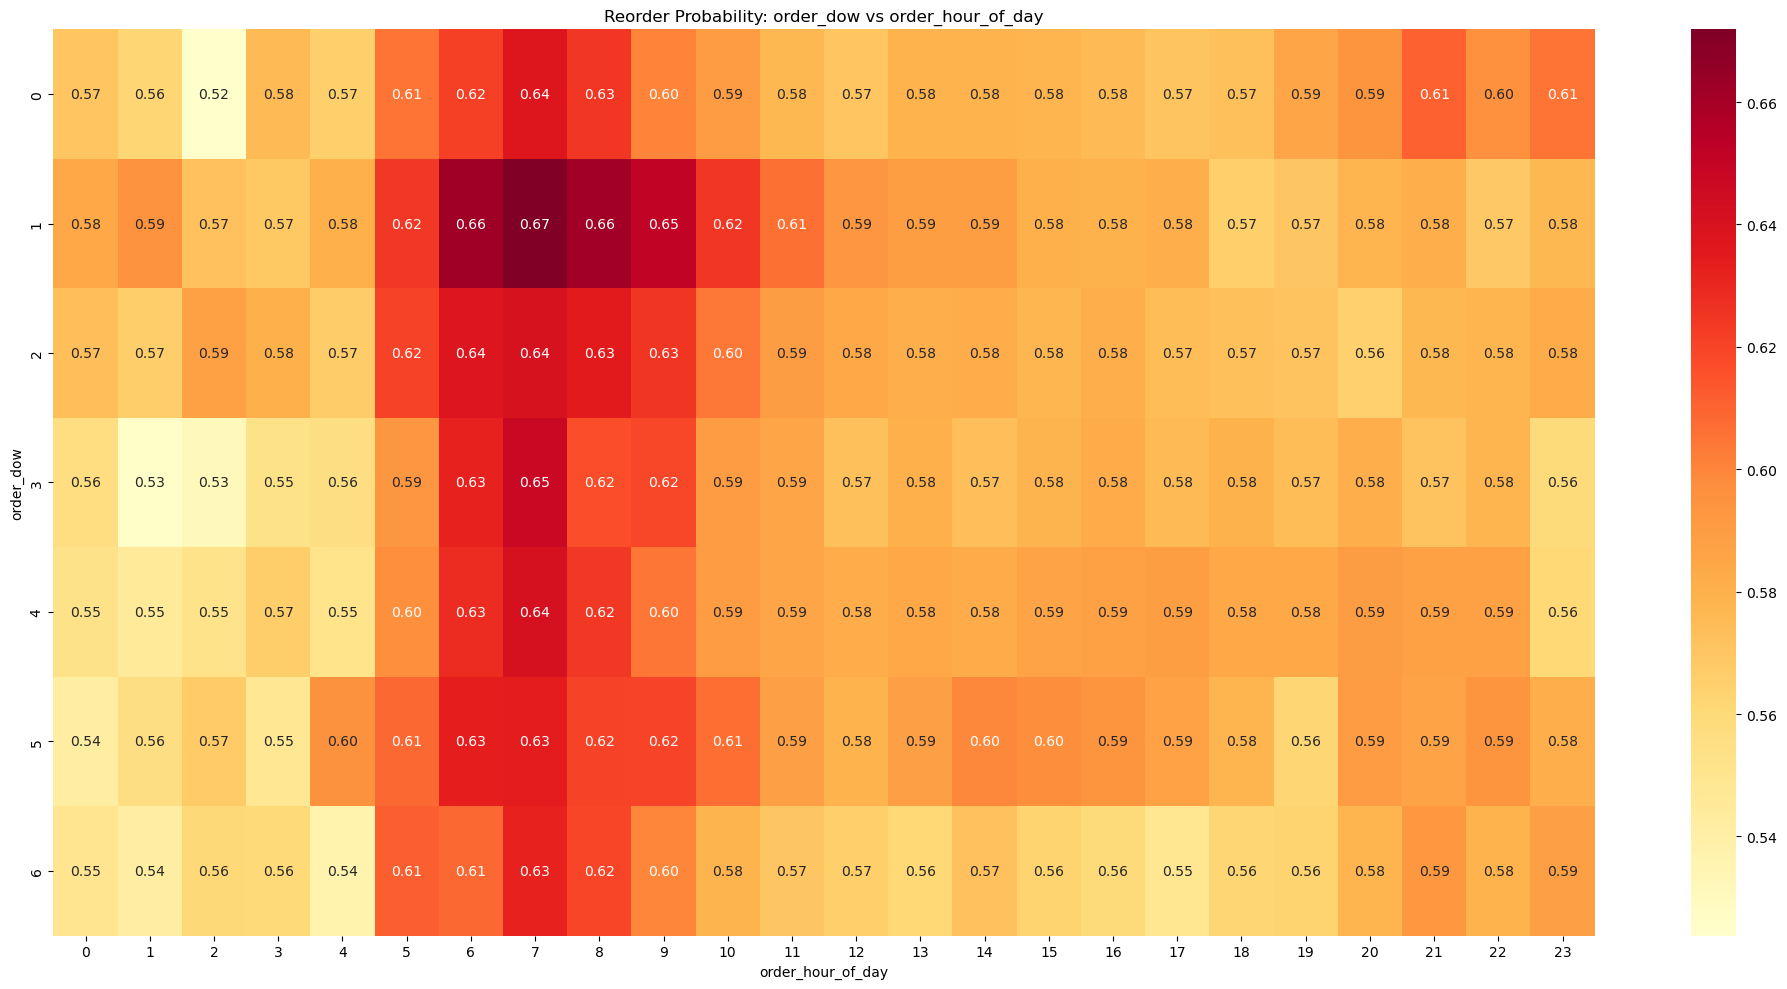

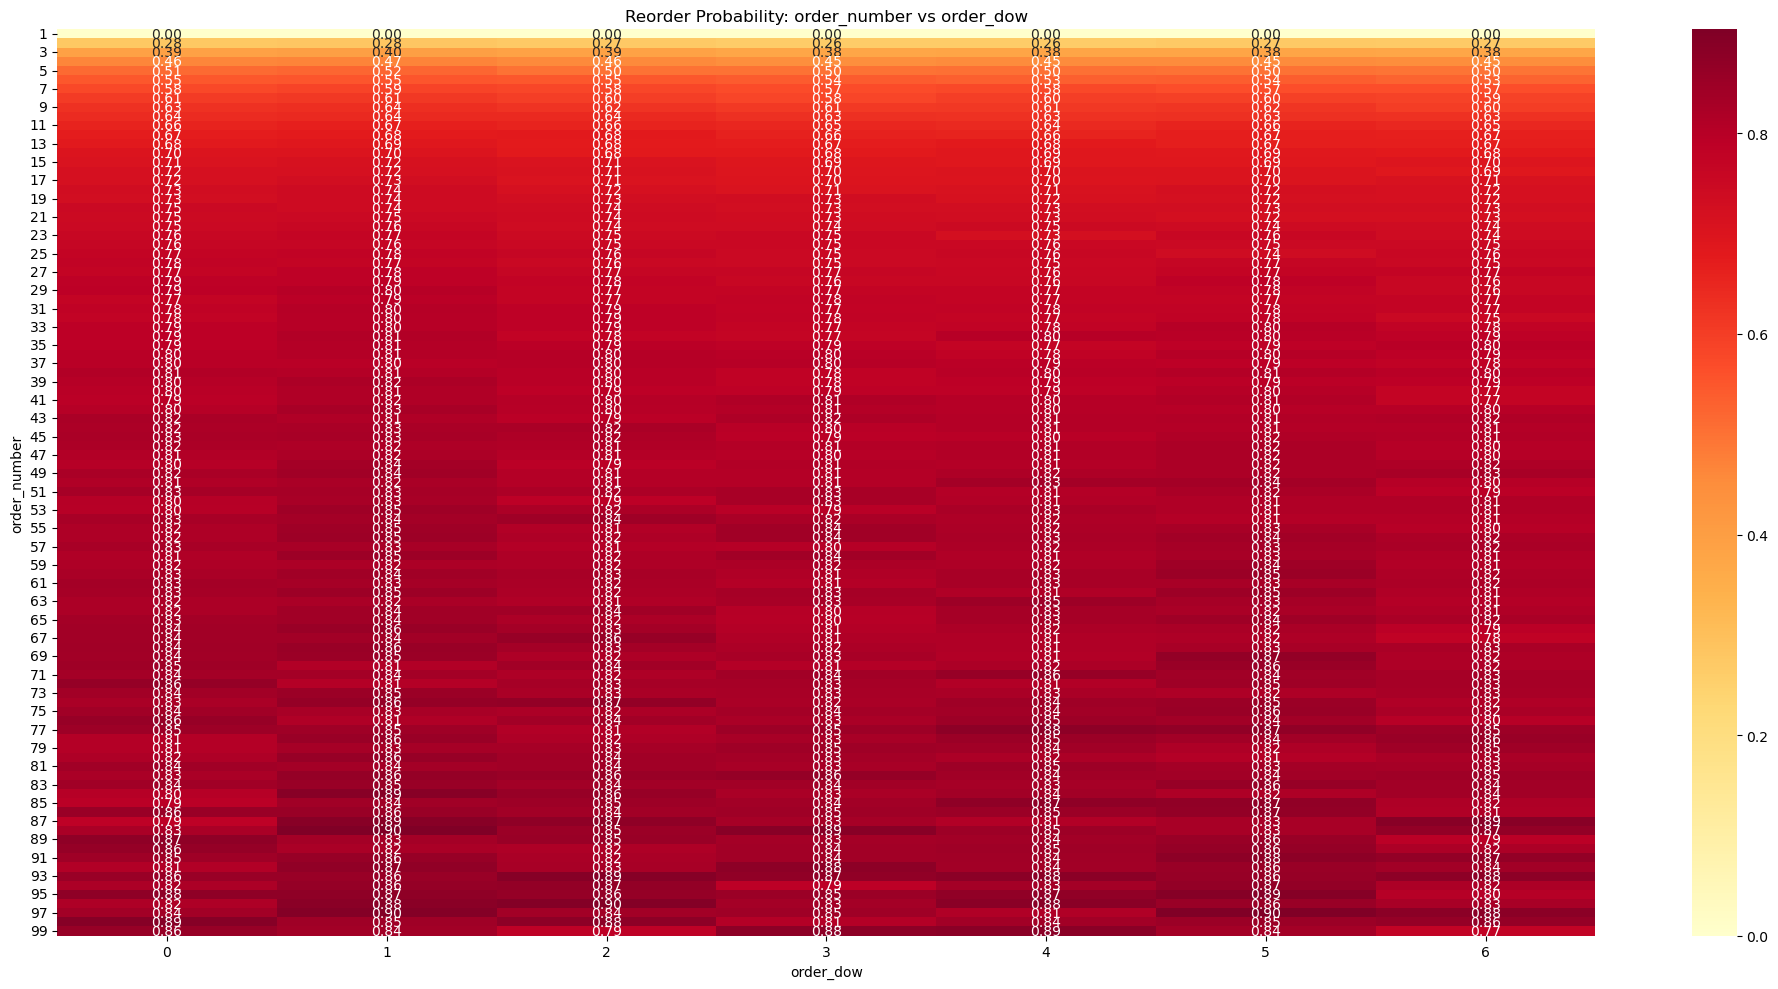

order_dow            0         1         2         3         4         5  \
order_number                                                               
1             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2             0.277045  0.281009  0.274247  0.264269  0.264025  0.273470   
3             0.391504  0.395459  0.388337  0.375679  0.377980  0.380999   
4             0.463400  0.467348  0.457128  0.448292  0.451967  0.454250   
5             0.514716  0.521629  0.500375  0.500339  0.501650  0.500845   
...                ...       ...       ...       ...       ...       ...   
95            0.875000  0.873134  0.864706  0.853933  0.871111  0.889868   
96            0.817204  0.883534  0.895833  0.835000  0.884615  0.857143   
97            0.837696  0.895397  0.840206  0.847059  0.814070  0.902439   
98            0.893082  0.846154  0.877095  0.807882  0.838863  0.851163   
99            0.858974  0.837321  0.786096  0.877301  0.885246  0.836364   

order_dow            6  
order_number            
1             0.000000  
2             0.268933  
3             0.376525  
4             0.449816  
5             0.495216  
...                ...  
95            0.804348  
96            0.828947  
97            0.880503  
98            0.864865  
99            0.773723  

[99 rows x 7 columns]

In [100]:
analyze_reorder_probability(stratified_df, 'order_dow', 'order_hour_of_day')
analyze_reorder_probability(stratified_df, 'order_number', 'order_dow')

### order hour of day and and order date of week heatmap along with the pivot table 

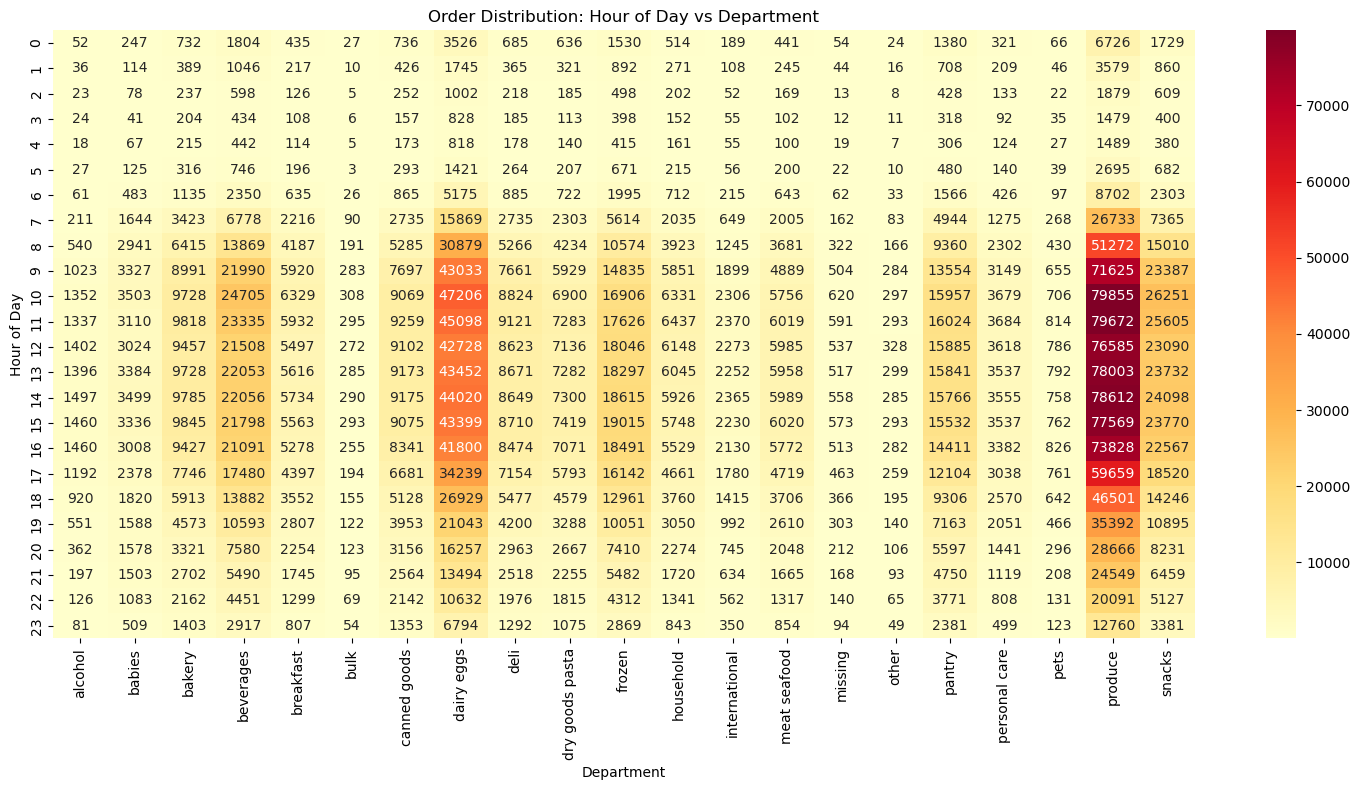

In [101]:

# Order patterns by hour and department
order_hour_dept = pd.crosstab(stratified_df['order_hour_of_day'], stratified_df['department'])
plt.figure(figsize=(15, 8))
sns.heatmap(order_hour_dept, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Order Distribution: Hour of Day vs Department')
plt.xlabel('Department')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

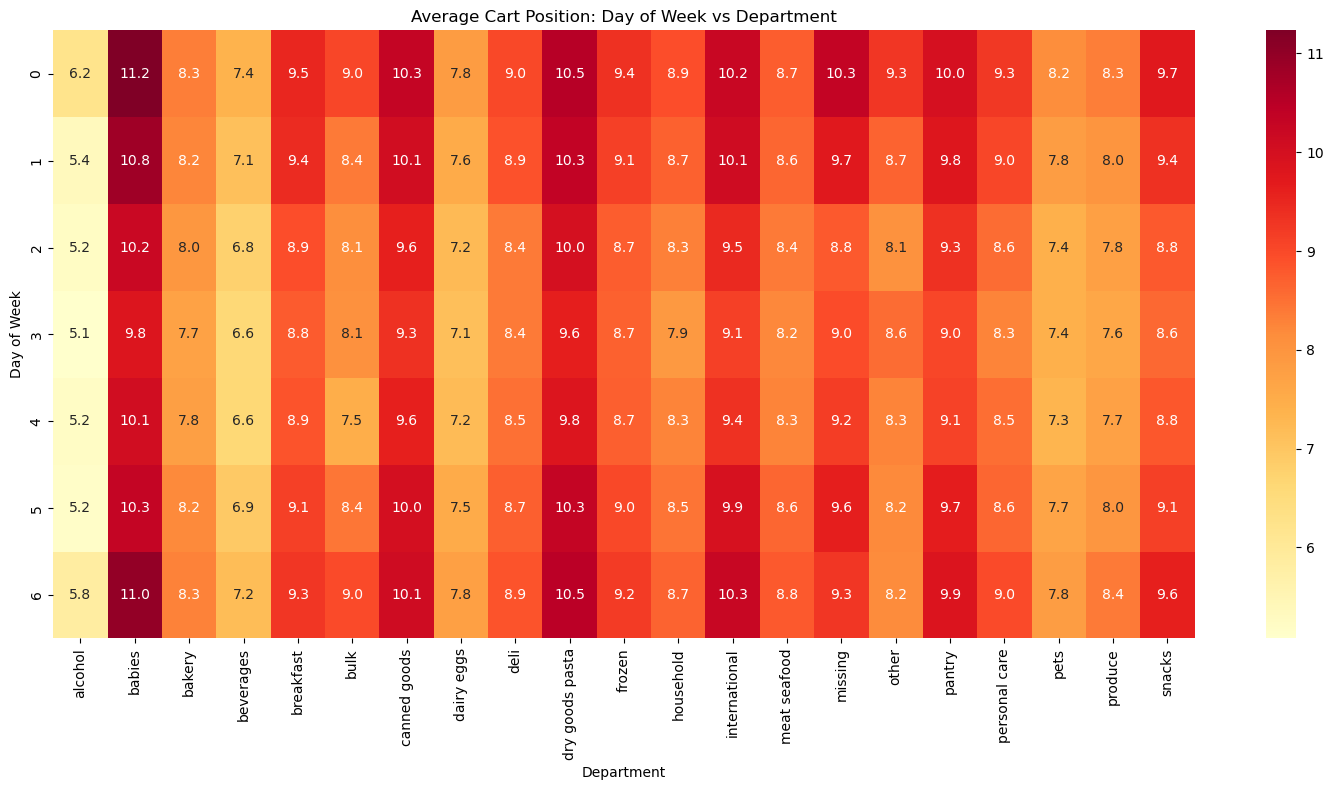

In [102]:
# Cart position analysis by day and department
cart_pos_day_dept = stratified_df.groupby(['order_dow', 'department'])['add_to_cart_order'].mean().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(cart_pos_day_dept, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Average Cart Position: Day of Week vs Department')
plt.xlabel('Department')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Reorder Rate by Hour and Day of Week')

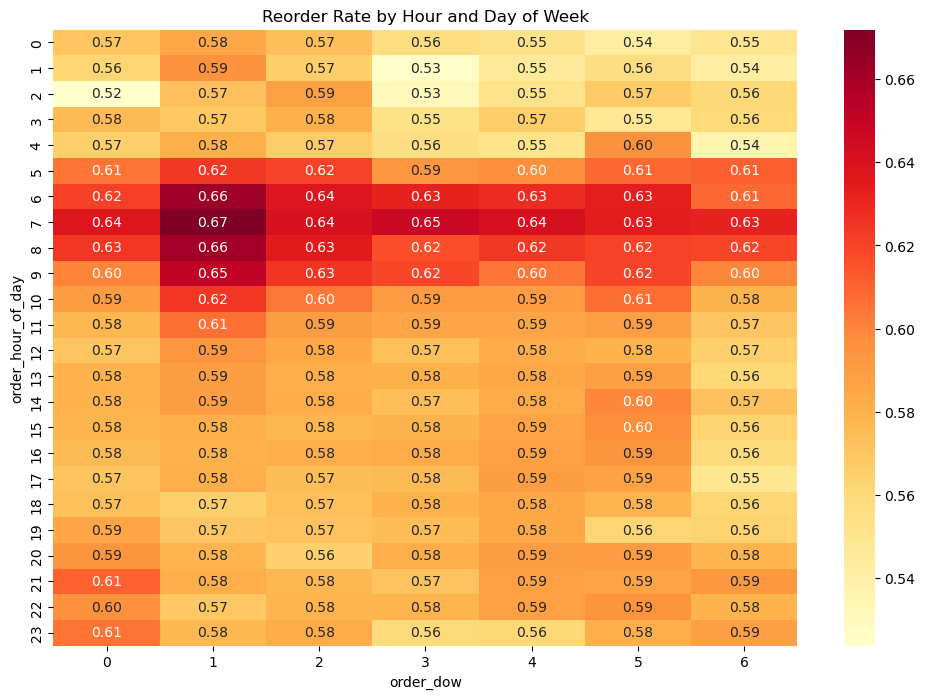

In [103]:
#  Hour vs Day vs Reorder Rate
pivot_table = stratified_df.pivot_table(
    values='reordered',
    index='order_hour_of_day',
    columns='order_dow',
    aggfunc='mean'
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Reorder Rate by Hour and Day of Week')

In [104]:
# 7. Print Summary Statistics for Multivariate Relationships
print("\nMultivariate Summary Statistics:")

# Reorder rate by day and hour
print("\nReorder Rate by Day and Hour (averaged):")
day_hour_reorder = stratified_df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().round(3)
print(day_hour_reorder.unstack())

# Average cart position by department and day
print("\nAverage Cart Position by Department and Day:")
dept_day_position = stratified_df.groupby(['department', 'order_dow'])['add_to_cart_order'].mean().round(2)
print(dept_day_position.unstack())

# Order patterns
print("\nOrder Patterns by Department and Day:")
dept_day_orders = pd.crosstab(stratified_df['department'], stratified_df['order_dow'])
print(dept_day_orders)

# Department-wise reorder statistics
print("\nDepartment-wise Reorder Statistics:")
dept_reorder_stats = stratified_df.groupby('department').agg({
    'reordered': ['mean', 'count', 'std'],
    'add_to_cart_order': ['mean', 'std']
}).round(3)
print(dept_reorder_stats)


Multivariate Summary Statistics:

Reorder Rate by Day and Hour (averaged):
order_hour_of_day     0      1      2      3      4      5      6      7   \
order_dow                                                                   
0                  0.570  0.562  0.524  0.576  0.565  0.605  0.621  0.638   
1                  0.584  0.595  0.572  0.569  0.580  0.624  0.662  0.672   
2                  0.573  0.567  0.588  0.580  0.567  0.621  0.638  0.640   
3                  0.556  0.526  0.531  0.553  0.556  0.594  0.632  0.647   
4                  0.553  0.545  0.552  0.566  0.551  0.597  0.628  0.641   
5                  0.542  0.556  0.567  0.549  0.595  0.608  0.633  0.634   
6                  0.549  0.542  0.560  0.560  0.537  0.611  0.608  0.632   

order_hour_of_day     8      9   ...     14     15     16     17     18  \
order_dow                        ...                                      
0                  0.625  0.601  ...  0.579  0.578  0.575  0.571  0.572   
1    

In [105]:
def assign_time_period(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 21:
        return 'Evening'
    else:
        return 'Night'

stratified_df['time_of_day'] = stratified_df['order_hour_of_day'].apply(assign_time_period)

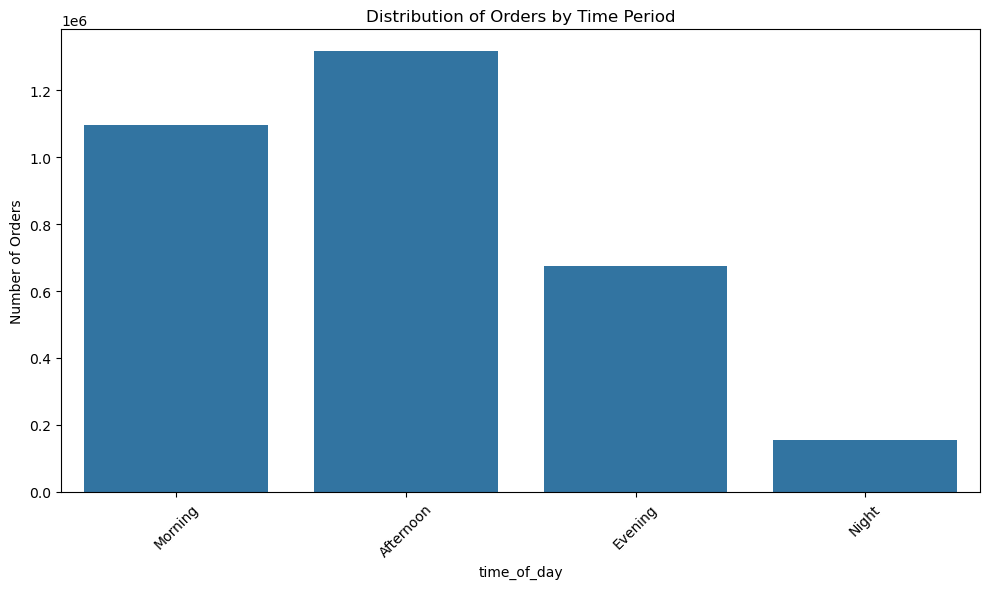

In [106]:
# Visualize distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_df, x='time_of_day', 
              order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Orders by Time Period')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### binning order_hour_of_day into time periods and we see customers order generally during the afternoon  

In [107]:

def order_frequency(order_num):
    if order_num == 1:
        return 'First Time'
    elif 2 <= order_num <= 5:
        return 'New Customer'
    elif 6 <= order_num <= 15:
        return 'Regular Customer'
    else:
        return 'Loyal Customer'

stratified_df['customer_type'] = stratified_df['order_number'].apply(order_frequency)

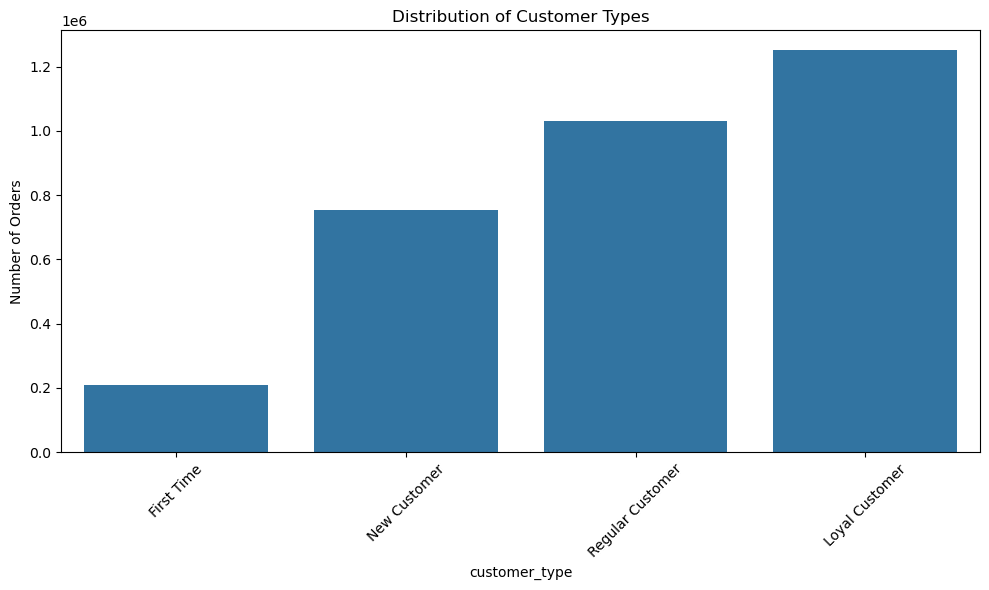

In [108]:
# Visualize distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_df, x='customer_type', 
              order=['First Time', 'New Customer', 'Regular Customer', 'Loyal Customer'])
plt.title('Distribution of Customer Types')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Binning order_number into frequency categories and here we can see the number of orders of loyal customers are more 

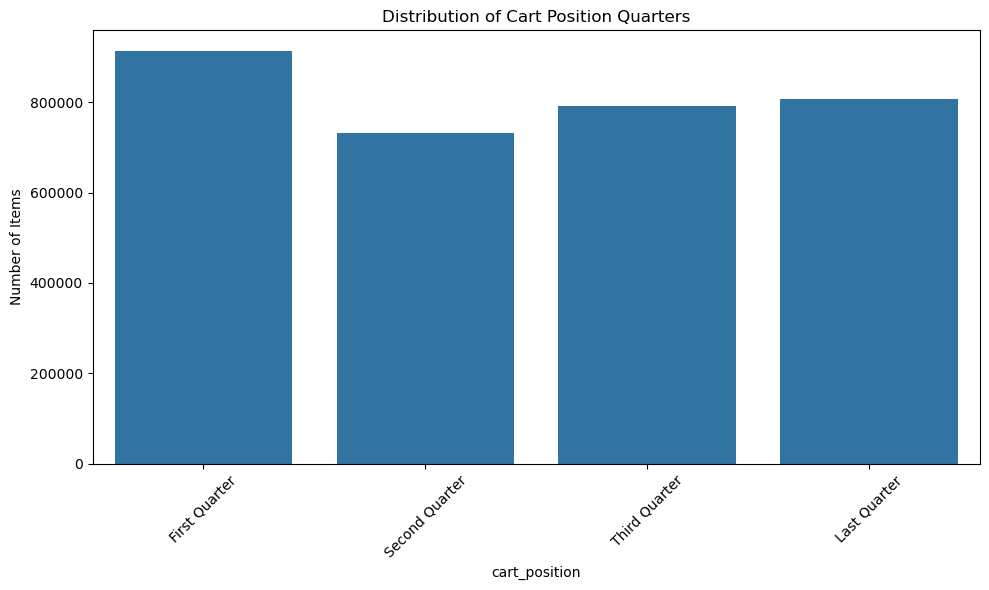

In [109]:
# 3. Binning add_to_cart_order into position categories
stratified_df['cart_position'] = pd.qcut(stratified_df['add_to_cart_order'], 
                                   q=4, 
                                   labels=['First Quarter', 'Second Quarter', 
                                         'Third Quarter', 'Last Quarter'])

plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_df, x='cart_position')
plt.title('Distribution of Cart Position Quarters')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Binning add_to_cart_order into cart_position categories with the number of items at first quarter are the highes

In [110]:
def days_since_order_category(days):
    if pd.isna(days):
        return 'First Order'
    elif days <= 7:
        return 'Within Week'
    elif days <= 14:
        return 'Within Fortnight'
    elif days <= 30:
        return 'Within Month'
    else:
        return 'More than Month'

stratified_df['order_recency'] = stratified_df['days_since_prior_order'].apply(days_since_order_category)

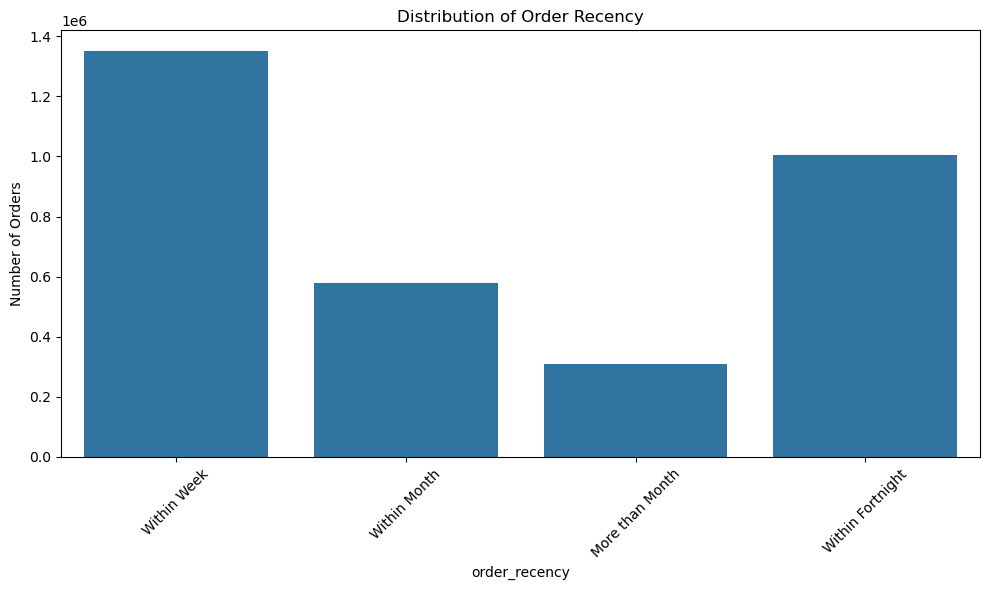

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_df, x='order_recency')
plt.title('Distribution of Order Recency')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### number of order within week are the highest 

In [112]:

# Reorder rate by time of day
reorder_time = stratified_df.groupby('time_of_day')['reordered'].mean().round(3)
print("\nReorder Rate by Time of Day:")
print(reorder_time)

# Reorder rate by customer type
reorder_cust = stratified_df.groupby('customer_type')['reordered'].mean().round(3)
print("\nReorder Rate by Customer Type:")
print(reorder_cust)

# Average cart position by time of day
cart_time = pd.crosstab(stratified_df['time_of_day'], stratified_df['cart_position'])
print("\nCart Position Distribution by Time of Day:")
print(cart_time)


Reorder Rate by Time of Day:
time_of_day
Afternoon    0.580
Evening      0.577
Morning      0.610
Night        0.575
Name: reordered, dtype: float64

Reorder Rate by Customer Type:
customer_type
First Time          0.000
Loyal Customer      0.774
New Customer        0.398
Regular Customer    0.625
Name: reordered, dtype: float64

Cart Position Distribution by Time of Day:
cart_position  First Quarter  Second Quarter  Third Quarter  Last Quarter
time_of_day                                                              
Afternoon             370234          298153         323535        324836
Evening               196860          157255         165353        156443
Morning               304942          242551         264842        283590
Night                  41460           33665          37144         42284


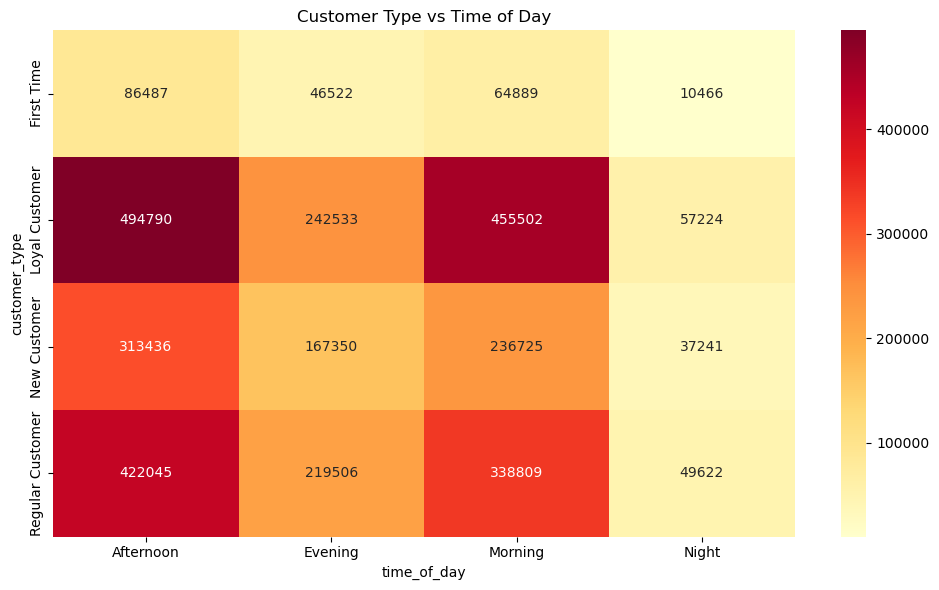

In [113]:
# Create heatmap of customer type vs time of day
customer_time_heatmap = pd.crosstab(stratified_df['customer_type'], stratified_df['time_of_day'])
plt.figure(figsize=(10, 6))
sns.heatmap(customer_time_heatmap, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Customer Type vs Time of Day')
plt.tight_layout()
plt.show()

### loyal customers mostly active during afternoon 

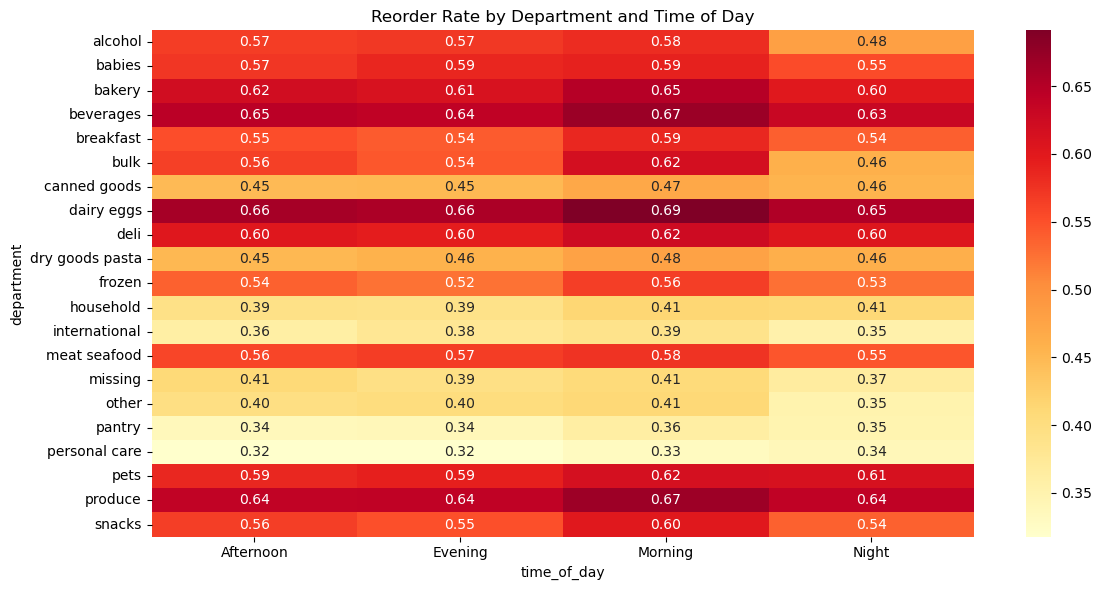

In [114]:
dept_time_reorder = stratified_df.groupby(['department', 'time_of_day'])['reordered'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(dept_time_reorder, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Reorder Rate by Department and Time of Day')
plt.tight_layout()
plt.show()

### Department analysis with binned data and dairy_eggs in morning is the most important

In [115]:

def peak_hours(row):
    hour = row['order_hour_of_day']
    day = row['order_dow']
    
    # Weekend peak hours
    if day in [5, 6]:  # Saturday and Sunday
        if 10 <= hour <= 18:
            return 'Weekend Peak'
        else:
            return 'Weekend Off-Peak'
    # Weekday peak hours
    else:
        if (8 <= hour <= 10) or (17 <= hour <= 19):
            return 'Weekday Peak'
        else:
            return 'Weekday Off-Peak'

stratified_df['peak_category'] = stratified_df.apply(peak_hours, axis=1)

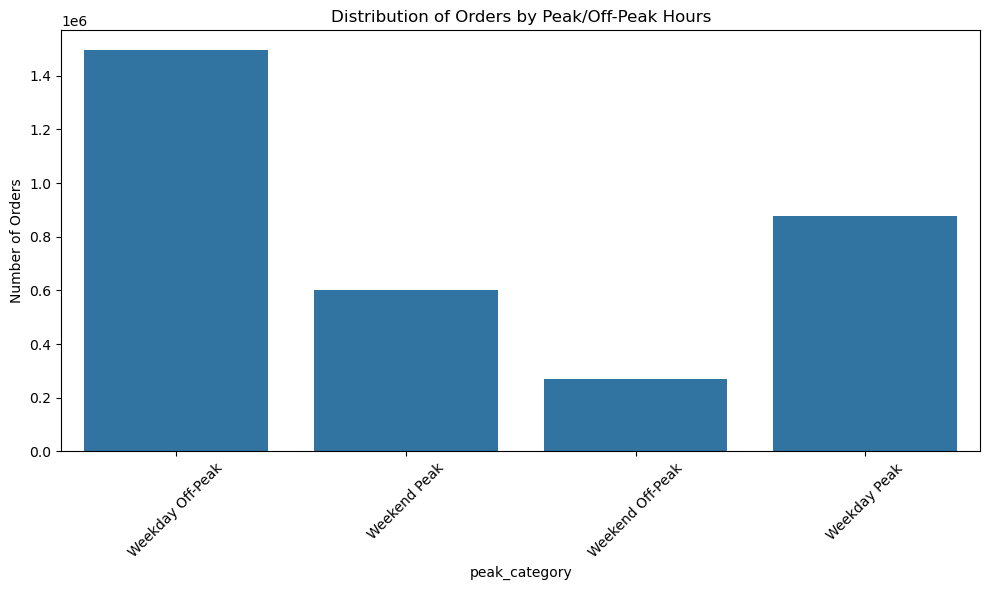

In [116]:
# Visualize peak/off-peak distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_df, x='peak_category')
plt.title('Distribution of Orders by Peak/Off-Peak Hours')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
# Analysis of reorder rates during peak/off-peak hours
peak_reorder = stratified_df.groupby('peak_category')['reordered'].agg(['mean', 'count'])
print("\nReorder Patterns During Peak/Off-Peak Hours:")
print(peak_reorder.round(3))


Reorder Patterns During Peak/Off-Peak Hours:
                   mean    count
peak_category                   
Weekday Off-Peak  0.586  1494728
Weekday Peak      0.600   877960
Weekend Off-Peak  0.599   268221
Weekend Peak      0.578   602238


In [118]:
# 7. Summary statistics of binned data
print("\nSummary of Binned Data:")

print("\nDistribution of Orders by Time of Day:")
print(stratified_df['time_of_day'].value_counts(normalize=True).round(3))

print("\nDistribution of Customer Types:")
print(stratified_df['customer_type'].value_counts(normalize=True).round(3))

print("\nDistribution of Cart Positions:")
print(stratified_df['cart_position'].value_counts(normalize=True).round(3))

print("\nDistribution of Order Recency:")
print(stratified_df['order_recency'].value_counts(normalize=True).round(3))


Summary of Binned Data:

Distribution of Orders by Time of Day:
time_of_day
Afternoon    0.406
Morning      0.338
Evening      0.208
Night        0.048
Name: proportion, dtype: float64

Distribution of Customer Types:
customer_type
Loyal Customer      0.385
Regular Customer    0.318
New Customer        0.233
First Time          0.064
Name: proportion, dtype: float64

Distribution of Cart Positions:
cart_position
First Quarter     0.282
Last Quarter      0.249
Third Quarter     0.244
Second Quarter    0.226
Name: proportion, dtype: float64

Distribution of Order Recency:
order_recency
Within Week         0.417
Within Fortnight    0.310
Within Month        0.178
More than Month     0.095
Name: proportion, dtype: float64


## Things to do:
- data preprocessing almost done but still check
- tests for categorical and numerical columns
- EDA for univariate, bivariate and multivariate
- binning and bucketing
- save plot and give a name
- Save it as a py file and give it a name EDA.py (work with modules in python)
- create a function that will print the value counts of the catgorical columns together
- create a EDA class that will be helpful for future use
- write the insights
- upload it on github